<b>Initialization</b>

<b><h1>Data Preparation</b></h1>

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('vgsales.csv')

df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

<b>Removing null values</b>

Too many null values means column is unnecessary and even burdenous,
therefore should be deleted.

Too little null values in a column means the rows with them can be deleted without
much of an effect on our data analysis later.

Upon checking via .head(), there doesn't seem to be any null values in the data set.

However, to make sure, we can use pd.isnull(df).any() to check the entire dataset 
for null values.
 - When used, "Year" and "Publisher" have null values in them.
 
Checking number of null values using df.isnull().sum()
 - Year: 271 
 - Publisher: 58 

We should also check for what the value of the null value for both are
 - For "year", we can use df['Year'].unique() since nunique is small enough
 - For "publisher", nunique is too large, but we can use a specific code that prints 
   rows with null values to see what it is 
   
   
Year: NaN <br>
Publisher: NaN <br>

Year Null Value Percentage (271 / 16598) : 1.63% <br>
Publisher Null Value Percentage (58 / 16598) : 0.35% <br>

Upon inspection of rows with null values, there seems to be quite a bit of rows with both
a missing "Year" and "Publisher".

Decision Points:
<ul>
    <li>Both Null Value Percentages Too Insignificantly Small</li>
    <li>Many rows with missing publishers also have missing years</li>
    <li>Many of these coincide with each other, which means less rows possible removed in total</li>
    <li>Extremely impractical to just remove the columns with null values, given its low percentage
        and how important both "Year" and "Publisher" are</li>
</ul>

Verdict: Remove rows with missing years and/or missing publishers

Number of rows before deletion: 16598
Number of rows after deletion: 16291

In total 307 rows removed in all, or 1.85% of the original size

In [2]:
df.head(30)

pd.isnull(df).any()

df.shape
#16598 columns in total

df.isnull().sum()

df['Year'].nunique()       #271
df['Publisher'].nunique()  #58

df['Year'].unique()
#The null value is "NaN"

null_test = pd.isnull(df['Publisher'])
df[null_test]
#The null value is "NaN"

nullrow_test = pd.isnull(df['Publisher'])
nullrow_test = pd.isnull(df['Year'])
df[nullrow_test].head(40)
#Inspection of rows will null values

df[df['Publisher'] == 'Unknown'].shape
#(203, 11)

df = df.dropna()
#Remove missing years and publishers

df.shape
#(16291, 11)


(16291, 11)

<b>Formatting Issues</b>

<i>Numerical values</i>
 - Because all sales values are float64 and the 0 value is 0.00 already
   there is no need to re-format the numerical values.
        
<i>Date and Time</i>
 - Year
   - Changed data type of "Year" from float64 to int64 to get rid of the decimal.
   
<i>Varying representation</i>
 - There doesn't seem to be a way to simplify any of the values in any of the columns,
   without making it more ambiguous, especially proper nouns,
   therefore no re-formats for varying representations will be made.

<i>Duplicate Data</i>
 - Using the code df.duplicated().unique(), the array returns only "False", meaning no duplicate
   data, therefore no changes will be made here.

<i>Others</i>
 - Removed rows with "Publisher" equal to "Unknown"
     - Will most definitely be mistaken for a name of a publisher during data analysis, and therefore
       will be undesirably lumped together.
     - Using the code df[df['Publisher'] == 'Unknown'].shape, there are only 100 of them
 - Remove rows with "Year" equal to 2017 to 2020
     - Only 3 rows or 2017 and 1 row for 2020, indicating a lack of a data input for those years
     - A quick google search and multiple websites/articles browsed will imply that there are games with more than 100k for those years, and that the data is almost obviously lacking
     - May wrongly suggest that games sales have come to a complete halt after 2016
     - Sample articles
         - https://vgsales.fandom.com/wiki/List_of_best-selling_video_games_of_2017
         - https://mybroadband.co.za/news/gaming/362324-the-10-best-selling-games-of-2020.html#:~:text=The%2010%20best-selling%20games%20of%202020%201%20The,3.%20...%2010%2010.%20Madden%20NFL%2020.%20
         - https://rushhourdaily.com/best-selling-video-games-of-the-year-2020/
     

In [3]:
#Numerical Values

df = df.astype({'Year': np.int})
df.head()

df = df[df['Publisher'] != 'Unknown']

df = df[(df['Year'] != 2017) & (df['Year'] != 2020)]

<b><h1>Data Analysis</b></h1>

Relationship Between Ranking And Sales
- This is to test just how proportional the ranking of the game is compared to the sales. 
- I will be testing it per region (i.e. NA, EU, JP, Others).

Findings:
- Sales will vary very differently per region as video games can sell well in some regions but do poorly in others. This is most evident when examining the standard deviations of sales per region.
- NA seems to be the best market when taking into account its mean, std, sales percentiles, and max. This is followed by EU, then Japan, then lastly the rest of the world.
  - It is also worth noting the "thin strip" of high sales present in the Rank-JP Sales graph.
- More than half of all games (as evident with the 50% percentile) will not even break the 100k threshold, but will at least do so in total globally. 
- The standard deviation (of all kinds of sales) increases dramatically as the rank approaches 1, which can indicate the success of games being concentrated into only a select few titles. This supports the shape of the graph which stretches highly when approaching Rank 1. When checking for specific std and max, the top 10 games have an std of 16.517351 and max of 82.740000, but the next 10 games have an std of 1.421949 and a max of 24.760000, which supports this claim.   

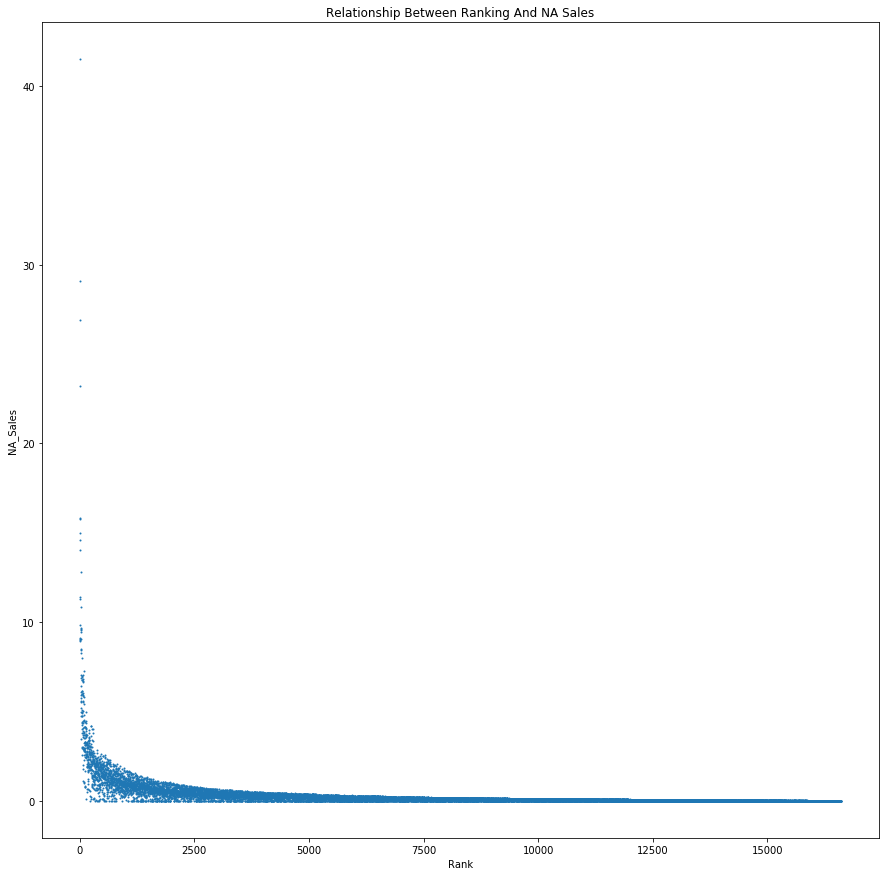

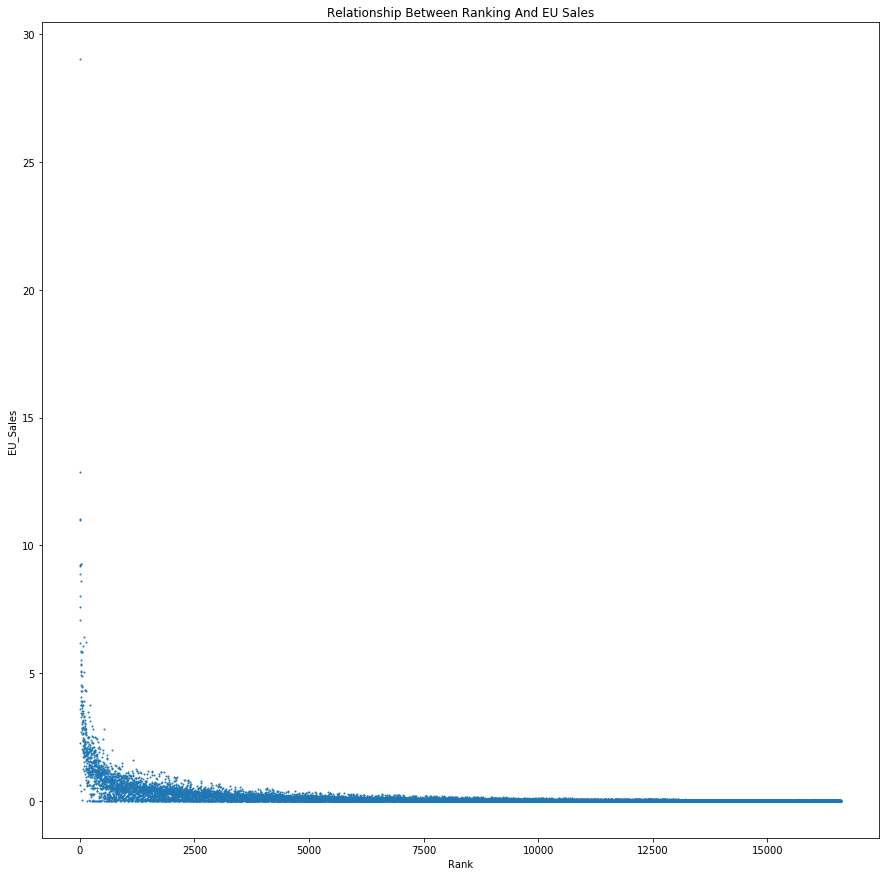

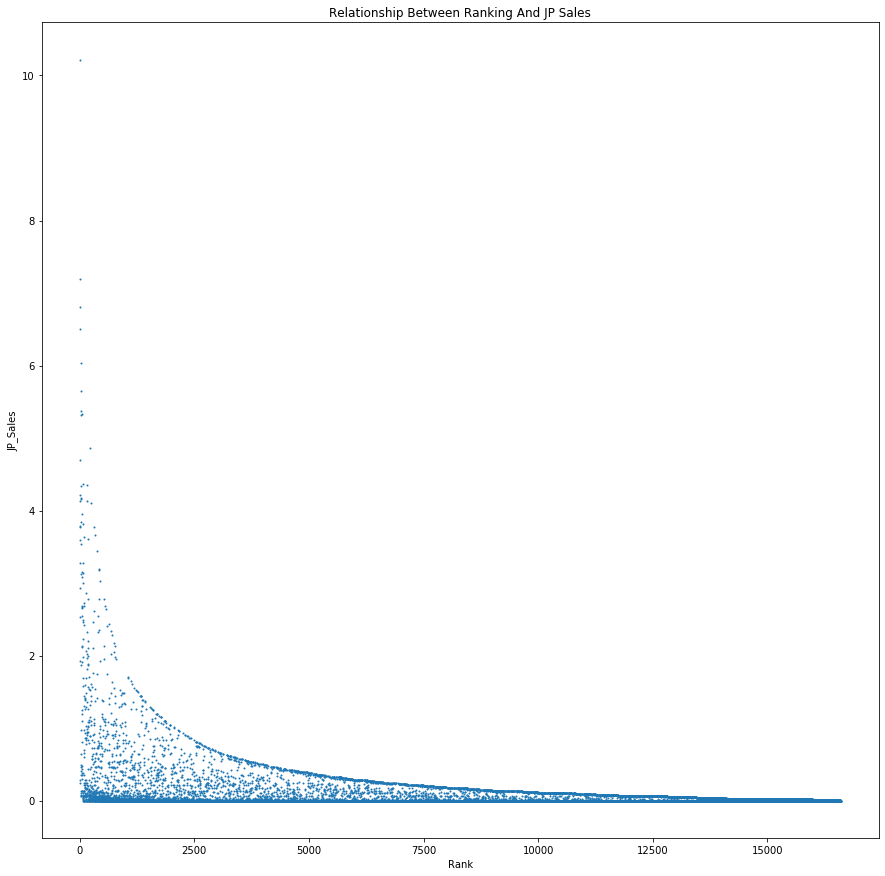

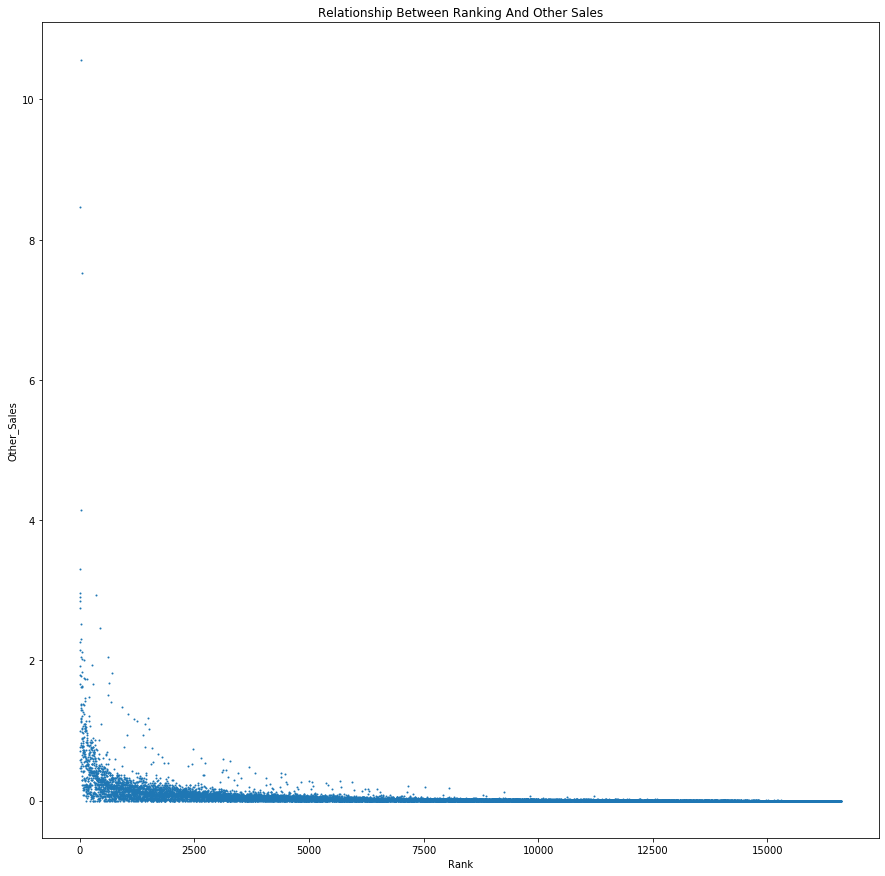

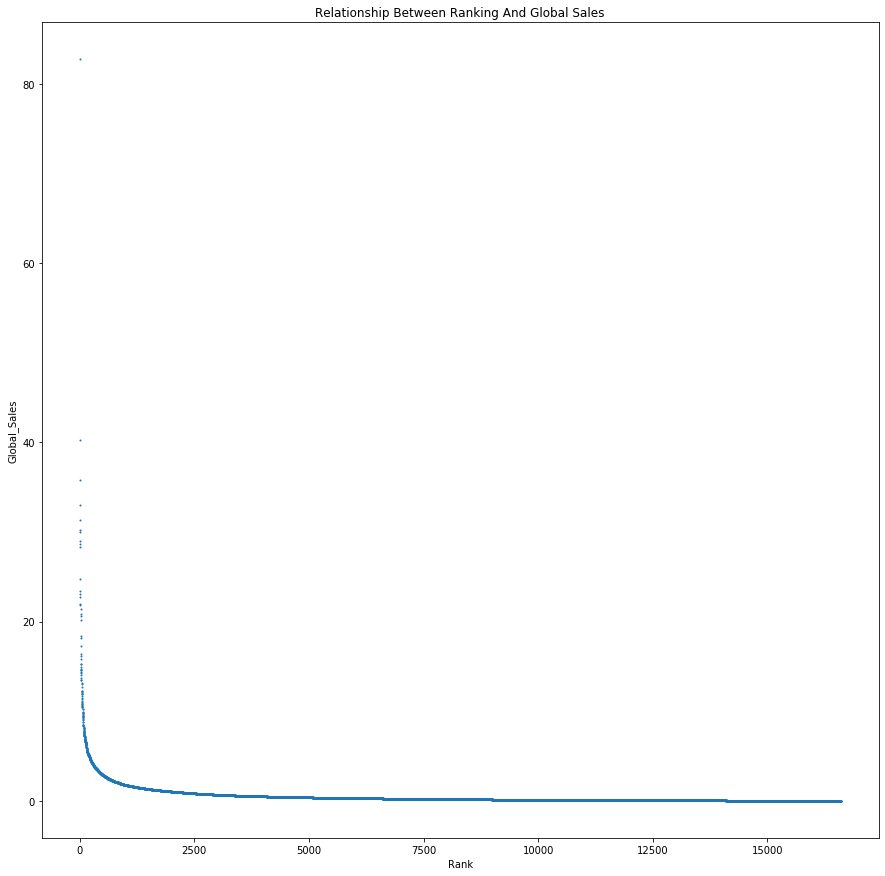

In [4]:
df['Global_Sales'].describe()
"""
count    16187.000000
mean         0.543522
std          1.571897
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
"""

df['NA_Sales'].describe()
"""
count    16187.000000
mean         0.266993
std          0.824835
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
"""

df['EU_Sales'].describe()
"""
count    16187.000000
mean         0.148451
std          0.510773
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
"""

df['JP_Sales'].describe()
"""
count    16187.000000
mean         0.079131
std          0.312723
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
"""

df['Other_Sales'].describe()
"""
count    16187.000000
mean         0.048675
std          0.190646
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
"""

ax = df.plot.scatter(x = 'Rank', y = 'NA_Sales', title = 'Relationship Between Ranking And NA Sales', s = 1, figsize=(15,15))
ax = df.plot.scatter(x = 'Rank', y = 'EU_Sales', title = 'Relationship Between Ranking And EU Sales', s = 1, figsize=(15,15))
ax = df.plot.scatter(x = 'Rank', y = 'JP_Sales', title = 'Relationship Between Ranking And JP Sales', s = 1, figsize=(15,15))
ax = df.plot.scatter(x = 'Rank', y = 'Other_Sales', title = 'Relationship Between Ranking And Other Sales', s = 1, figsize=(15,15))
ax = df.plot.scatter(x = 'Rank', y = 'Global_Sales', title = 'Relationship Between Ranking And Global Sales', s = 1, figsize=(15,15))

plt.show(block = True)

#test = df[(df['Rank'] >= 1) & (df['Rank'] <= 10)]
#test = df[(df['Rank'] >= 11) & (df['Rank'] <= 20)]
#test.Global_Sales.sum()

#test.describe()

#df.describe()
#df['Global_Sales'].describe()

Video Game Sales Throughout The Years
- For this section, I will try to analyze the total number of sales for a game per year, as well as its increase (or decrease).
- I will be checking it globally at first, then per region.


Findings (Global):
- Between 1980-1995, video game sales per year fluctuated mildly below 100M, but slowly increased overtime.
- Between 1995-2000, video game sales per year started increasing rapidly, particularly in 1995-1996 when it more than doubled and in 1997-1998.
- Between 2000-2008, video game sales per year increased ever rapidly (apart from 2002-2003), growing by as much as 250%.
- However, after 2008, the "spark is gone": sales dropped very sharply in between those years, plumetting by around 90%. The years with the worst drop were from 2011-2012 and 2015-2016. 2012-2013 experienced flat growth.


Findings (Per Region):
- All the Regions' graphs have about the same shape as with the graph for Global Sales. There are, however, several key differences to take note of.
    - Japanese sales from 1995-2000 actually decreased, and it kept on decreasong until midway between 2000-2005.
    - Japanese sales began its rapid decline earlier than the others, at around 2006.
    - While the increases and decreases may be similar, the rate/steepness of such varies greatly between the 4 regions
    - Only NA did not start from a near 0 million copies in 1980
    - Only NA did not experience any noticeable growth at all since 2008. The rest experienced small growth from 2011-2012.
- The total sales of both Japan and Others have never broken past 100M sales.
- Out of all the regions, NA seems to be the most similar to that of the global sales graph. This may well imply that its sales are the most influential and most impactful.
- NA is the region that would experience the most growth, but is also equally likely to experience the most decline.
- NA sales accounts for almost half of all global sales worldwide, when counting all sales made between 1980-2015. In 1980 it used to account for 93% of all sales worldwide, however that share has decreased overtime to only 40% by 2015.
    - Interestingly, Japanese Sales had a fair share of the global market from 1982-1995, but has sharply decreased since then and has only recently seen promising increase. Both EU and the rest of the world had a slowly increasing share of the market since 1980, when both were at near 0.
- When checking the number of games produced per year, the number of games produced on a yearly basis has actually remained constantly low from 1980-1990 (except from 1980-1981). Despite this, game sales still fluctuated in NA and EU, less so in JP, almost none at all in Others.
- When checking the number of games produced in all other years, there seems to "generally" be a correlation between the number of games produced (or at least those that breach the 100k mark) to the total sales, as sales generally increase or decrease whenever the number of productions that hit the 100k mark increases or decreases as well (and vice versa).

(0, 1500)

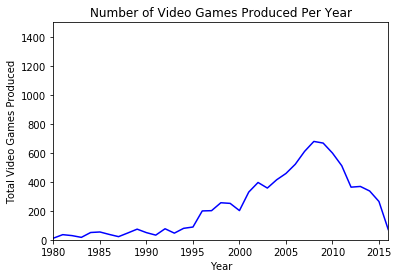

In [95]:
#Global

df.groupby('Year').Global_Sales.sum()

#chart = df.groupby('Year').Global_Sales.sum().plot(color = 'blue')

#chart.set_title("Global Video Game Sales Per Year (In Million Copies)")
#chart.set_ylabel('Total Global Game Sales (In Millions)')
#chart.set_xlim(1980, 2016)
#chart.set_ylim(0,700)


#chart.set_xlim(1980, 1995)
#chart.set_ylim(0,105)

#chart.set_xlim(1995, 2000)
#chart.set_ylim(0,305)

#chart.set_xlim(2000, 2008)
#chart.set_ylim(0,800)

#chart.set_xlim(2008, 2016)
#chart.set_ylim(0,700)

chart = df.groupby('Year').Global_Sales.sum().plot(color = 'blue')
#chart = df.groupby('Year').Rank.count().plot(color = 'red')
chart.set_title("Number of Video Games Produced Per Year")
chart.set_ylabel('Total Video Games Produced')
chart.set_xlim(1980, 2016)
chart.set_ylim(0,1500)

0.468793411391149

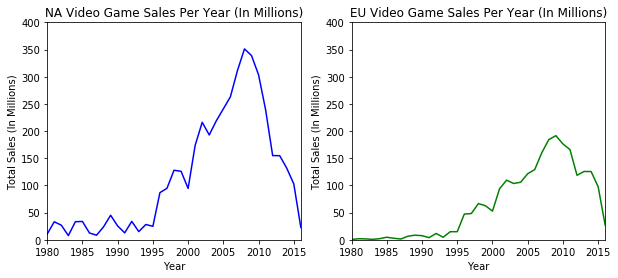

In [6]:
fig = plt.figure(figsize = (10,4))

p = fig.add_subplot(121)
p.set_title("NA Video Game Sales Per Year (In Millions)")
p.set_xlim(1980, 2016)
p.set_ylim(0,400)
p.set_xlabel('Year')
p.set_ylabel('Total Sales (In Millions)')

na = df.groupby('Year').NA_Sales.sum()
plt.plot(na, color = 'blue')


p = fig.add_subplot(122)
p.set_title("EU Video Game Sales Per Year (In Millions)")
p.set_xlim(1980, 2016)
p.set_ylim(0,400)
p.set_xlabel('Year')
p.set_ylabel('Total Sales (In Millions)')

eu = df.groupby('Year').EU_Sales.sum()
plt.plot(eu, color = 'green')

df[df['Year'] == 1980].NA_Sales.sum() / df[df['Year'] == 1980].Global_Sales.sum()
df[df['Year'] == 2000].NA_Sales.sum() / df[df['Year'] == 2000].Global_Sales.sum()
#Global Sales = 8797.99

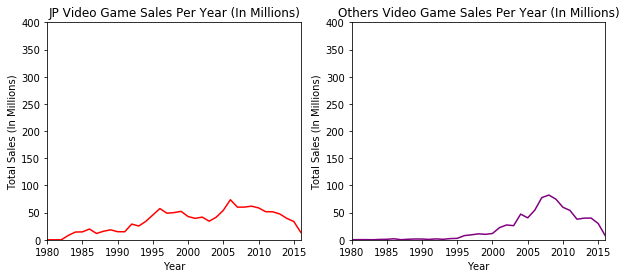

In [7]:
fig = plt.figure(figsize = (10,4))

p = fig.add_subplot(121)
p.set_title("JP Video Game Sales Per Year (In Millions)")
p.set_xlim(1980, 2016)
p.set_ylim(0,400)
p.set_xlabel('Year')
p.set_ylabel('Total Sales (In Millions)')

jp = df.groupby('Year').JP_Sales.sum()
plt.plot(jp, color = 'red')


p = fig.add_subplot(122)
p.set_title("Others Video Game Sales Per Year (In Millions)")
p.set_xlim(1980, 2016)
p.set_ylim(0,400)
p.set_xlabel('Year')
p.set_ylabel('Total Sales (In Millions)')

others = df.groupby('Year').Other_Sales.sum()
plt.plot(others, color = 'purple')

Publisher/Platform To Sales And Ranking
- For this section, I will be experimenting with the relationship of the publisher and platform to the Sales And Ranking.
- To simplify things, I decided to lump both Publisher and Platform together into this one data analysis.
- I will start by checking out the quantity of the two columns, specifically the number of games per platform and the number of games per publisher.
- Next, I will be checking each one against both its ranking and its sales. For sales, I will start first with global sales, then check it per region.

Findings (Platform):
- More than half of all global sales are within just 5 platforms: PS2, X360, PS3, Wii, DS. When compared to the value counts per Platform, these same 5 platforms (although in a different arrangement) comprise almost half of all games published (9224/16187).
- Upon checking, each region has a different best-selling platform:
    - NA: X360 (593.71)
    - EU: PS3 (340.31)
    - JP: DS (174.77)
    - Other: PS2 (190.02)
- Based on the top 5 platforms, Japan's best selling platforms varies rather differently from other regions, having a market dominated by sales from Nintendo-made products.
- Unfortunately, there does not seem to be any clear findings regarding to the rank of the platform.

Findings (Publisher):
- Unfortunately, due to the sheer size of the number of publishers, I am only going to be primarily focusing on the top 10 publishers globally and per region.
- Much like when checking the Platforms, the top selling publishers would more or less also be the ones with the most games. However, unlike in platforms, the rankings of the publishers with the most games vary differently from those with the highest global sales, especially the top 5 publishers of each one.
- The top selling publishers of each region vary rather greatly, the most obvious one is Japan, which is dominated by Japanese publishers and only shares 3 "top-10s" with the rest of the world.
- In all regions, Nintendo comes out as the top selling publisher, followed by EA (except in "Others", where EA is the top seller followed by Nintendo). The other top 10 in each region with have similar titles but in a different arrangement (except in Japan)
    - It should also be noted that Nintendo is only the 7th highest video game producer, whreas EA is 1st. This may imply that they have higher density of top-selling games.
- In both data analysis and examining the dataset, Nintendo has produced the top 15 games by million copies sold worldwide , in addition to 23/30 of the best selling games.
- The publishers with the highest ranking games ( .min() ) seem to be very similar to the ones with the highest global sales and the ones with the most games produced, unlike in "Platform".

Text(0, 0.5, 'Global Games')

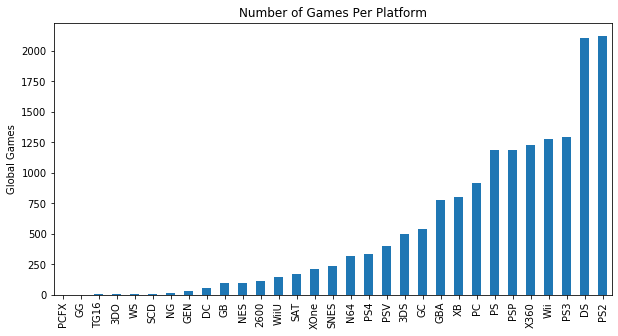

In [8]:
df['Platform'].value_counts()
"""
PS2     2124
DS      2108
PS3     1294
Wii     1278
X360    1230
PSP     1190
PS      1187
PC       919
XB       803
GBA      780
GC       541
3DS      494
PSV      402
PS4      334
N64      316
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
"""

test = df['Publisher'].value_counts()
test.describe()
test.head(20)
test.tail(20)

df['Publisher'].value_counts().value_counts().head(50)

"""
count     575.000000
mean       28.151304
std       115.445900
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1339.000000
"""

df.groupby('Platform').Publisher.value_counts()
df.groupby('Year').Publisher.value_counts()
#------------------------------------------------------------

test_pl = df.groupby('Platform').Global_Sales
"""
DS       817.44
Wii      909.03
PS3      948.01
X360     968.70
PS2     1230.69
"""

test_pl = df.groupby('Platform').NA_Sales
"""
DS      387.75
PS3     388.14
Wii     497.00
PS2     572.18
X360    593.71
"""

test_pl = df.groupby('Platform').EU_Sales
"""
PS      212.02
Wii     264.01
X360    277.83
PS2     331.50
PS3     340.31
"""

test_pl = df.groupby('Platform').JP_Sales
"""
NES      98.65
SNES    116.55
PS2     137.08
PS      139.78
DS      174.77
"""

test_pl = df.groupby('Platform').Other_Sales
"""
DS       60.22
Wii      79.14
X360     84.60
PS3     140.71
PS2     190.02
"""

test_pl.describe()
test_pl.sum().sort_values().head(50)

#test_pb = df.groupby('Publisher').Global_Sales
#test_pb.describe()
#test_pb.sum()

df['Platform'].value_counts().head(5).sum()

#chart = df.groupby('Platform').Global_Sales.sum().sort_values().tail(31).plot(kind = 'bar', figsize = (10,5))
chart = df['Platform'].value_counts().sort_values().tail(31).plot(kind = 'bar', figsize = (10,5))
chart.set_title('Number of Games Per Platform')
chart.set_ylabel('Global Games')

#df.groupby('Platform').Rank.min().sort_values()
#df.groupby('Platform').Rank.max().sort_values()
#df.groupby('Platform').Rank.mean().sort_values()


#chart = df.groupby('Platform').Rank.min().sort_values().plot(kind = 'line', figsize = (10,5))
#chart = df.groupby('Platform').Rank.max().sort_values().plot(kind = 'line', figsize = (10,5))
#chart = df.groupby('Platform').Rank.mean().sort_values().plot(kind = 'line', figsize = (10,5))

Text(0.5, 0, 'Total Number of Games')

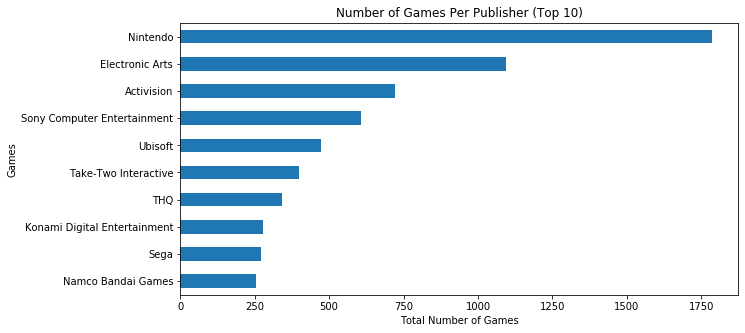

In [182]:
df['Publisher'].value_counts().head(30)
"""
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    917
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       630
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Eidos Interactive                          196
Midway Games                               196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3Publisher                                183
Vivendi Games                              161
Codemasters                                150
Idea Factory                               127
Deep Silver                                121
Zoo Digital Publishing                     104
Nippon Ichi Software                       104
Majesco Entertainment                       90
LucasArts                                   89
"""

test_pl = df.groupby('Publisher').Global_Sales
"""
Namco Bandai Games               253.65
Sega                             270.66
Konami Digital Entertainment     278.56
THQ                              340.44
Take-Two Interactive             399.30
Ubisoft                          473.25
Sony Computer Entertainment      607.28
Activision                       721.41
Electronic Arts                 1093.39
Nintendo                        1784.43
"""

test_pl = df.groupby('Publisher').NA_Sales
"""
Atari                          101.23
Sega                           108.78
Microsoft Game Studios         155.35
THQ                            208.60
Take-Two Interactive           220.47
Ubisoft                        252.54
Sony Computer Entertainment    265.22
Activision                     426.01
Electronic Arts                584.22
Nintendo                       815.75
"""

test_pl = df.groupby('Publisher').EU_Sales
"""
Microsoft Game Studios           68.61
Konami Digital Entertainment     68.62
Sega                             81.41
THQ                              94.60
Take-Two Interactive            117.95
Ubisoft                         163.03
Sony Computer Entertainment     187.55
Activision                      213.72
Electronic Arts                 367.38
Nintendo                        418.30
"""

test_pl = df.groupby('Publisher').JP_Sales
"""
Tecmo Koei                       29.21
Enix Corporation                 32.40
SquareSoft                       40.13
Square Enix                      49.79
Sega                             56.15
Capcom                           67.38
Sony Computer Entertainment      74.10
Konami Digital Entertainment     90.93
Namco Bandai Games              126.84
Nintendo                        454.99
"""


test_pl = df.groupby('Publisher').Other_Sales
"""
Microsoft Game Studios           18.56
Sega                             24.30
Konami Digital Entertainment     29.91
THQ                              32.11
Ubisoft                          50.14
Take-Two Interactive             55.20
Activision                       74.79
Sony Computer Entertainment      80.40
Nintendo                         95.19
Electronic Arts                 127.63
"""

test_pl.sum().sort_values().tail(10)

df.groupby('Publisher').Rank.min().sort_values().head(10)
#df.groupby('Publisher').Rank.max().sort_values().head(10)
#df.groupby('Publisher').Rank.mean().sort_values().head(10)

chart = df.groupby('Publisher').Global_Sales.sum().sort_values().tail(10).plot(kind = 'barh', figsize = (10,5))
#chart = df['Platform'].value_counts().sort_values().tail(10).plot(kind = 'bar', figsize = (10,5))
chart.set_title('Number of Games Per Publisher (Top 10)')
chart.set_ylabel('Games')
chart.set_xlabel('Total Number of Games')

Genre Test
- This portion is just for me to try and experiment with the Genre column, in order to see what I can find.

Findings:
- The top selling games globally are Action and Sports Games, collectively making up over a third of all games from 1980-2015. In addition to this, they are also the most widely sold types of games within the same period. 
- When analyzing each genre global sale on a yearly basis, both Action and Sports games began dominating global sales after 2000. In fact, the rapid increase in video game sales around this time may also be attributed to these two genres.
- Upon closer inspection of the dataset and in particular analyzing the top games sold, many of the sudden spikes in video game sales for a specific genre can be attribute to just one high-selling game (ex. Wii Sports for [Sports-2006], Super Mario Bros. for [Platform-1985], Pokemon Red/Pokemon Blue for [Role Playing-1996])
- For these Genres, most or all of the sudden surge in video game sales can be attributed solely to these franchises:
    - Sports: Wii, Fifa
    - Adventure: Super Mario
    - Racing: Mario Kart, Gran Turismo
    - Role-Playing: Pokemon
    - Shooter: Call of Duty
    - Action: GTA
- All Genres experienced a decrease in sales from 2010-2015, particularly in 2015 where the drop was in its greatest. This comes in similarly to the total global sales recession trend from the graph earlier.
- When checking it per region, the most sold video game genre in NA, EU, and the rest of the world is Action, followed by Sports and Shooter, respectively. Only in Japan is this not the case, where the most video game genre there is Role-Playing, followed by Action and then Sports (Shooter is actually the least sold genre in Japan). 
- Also, when checking it per region, it follows the trend that generally, regardless of genre, NA is the top market for a game, followed by EU, JP, and lastly the rest of the world.
- The platform with the most number of genre games (being the top platform for 5 different genres) is DS (as seen below).
    <br><br>
    
    <ul>
        <li>Top Platform for Action Games = PS3</li>
        <li>Top Platform for Sports Games = PS2 (by 137 games)</li>
        <li>Top Platform for Shooter Games = X360</li>
        <li>Top Platform for RP Games = DS (although PSP, PS2, and PS3 are not far behind)</li>
        <li>Top Platform for Platform Games = GBA</li>
        <li>Top Platform for Misc Games = DS (by 116 games)</li>
        <li>Top Platform for Racing Games = PS2</li>
        <li>Top Platform for Fighting Games = PS2</li>
        <li>Top Platform for Simulation Games = DS (by a landslide)</li>
        <li>Top Platform for Puzzle Games = DS (by a landslide)</li>
        <li>Top Platform for Adventure Games = DS</li>
        <li>Top Platform for Strategy Games = PC (by a landslide)</li>
    </ul>
    
    <br>
    
    <ul>
        <li>Top Publisher for Action Games = Activision</li>
        <li>Top Publisher for Sports Games = Electronic Arts (by a massive landslide)</li>
        <li>Top Publisher for Shooter Games = Activision</li>
        <li>Top Publisher for RP Games = Namco Bandai Games</li>
        <li>Top Publisher for Platform Games = Nintendo (by 27 games)</li>
        <li>Top Publisher for Misc Games = Ubisoft (by 23 games)</li>
        <li>Top Publisher for Racing Games = Electronic Arts</li>
        <li>Top Publisher for Fighting Games = Namco Bandai Games</li>
        <li>Top Publisher for Simulation Games = Ubisoft (just one game ahead of Electronic Arts)</li>
        <li>Top Publisher for Puzzle Games = Nintendo (by a massive landslide)</li>
        <li>Top Publisher for Adventure Games = Idea Factory (by 21 games)</li>
        <li>Top Publisher for Strategy Games = Namco Bandai Games</li>
    </ul>

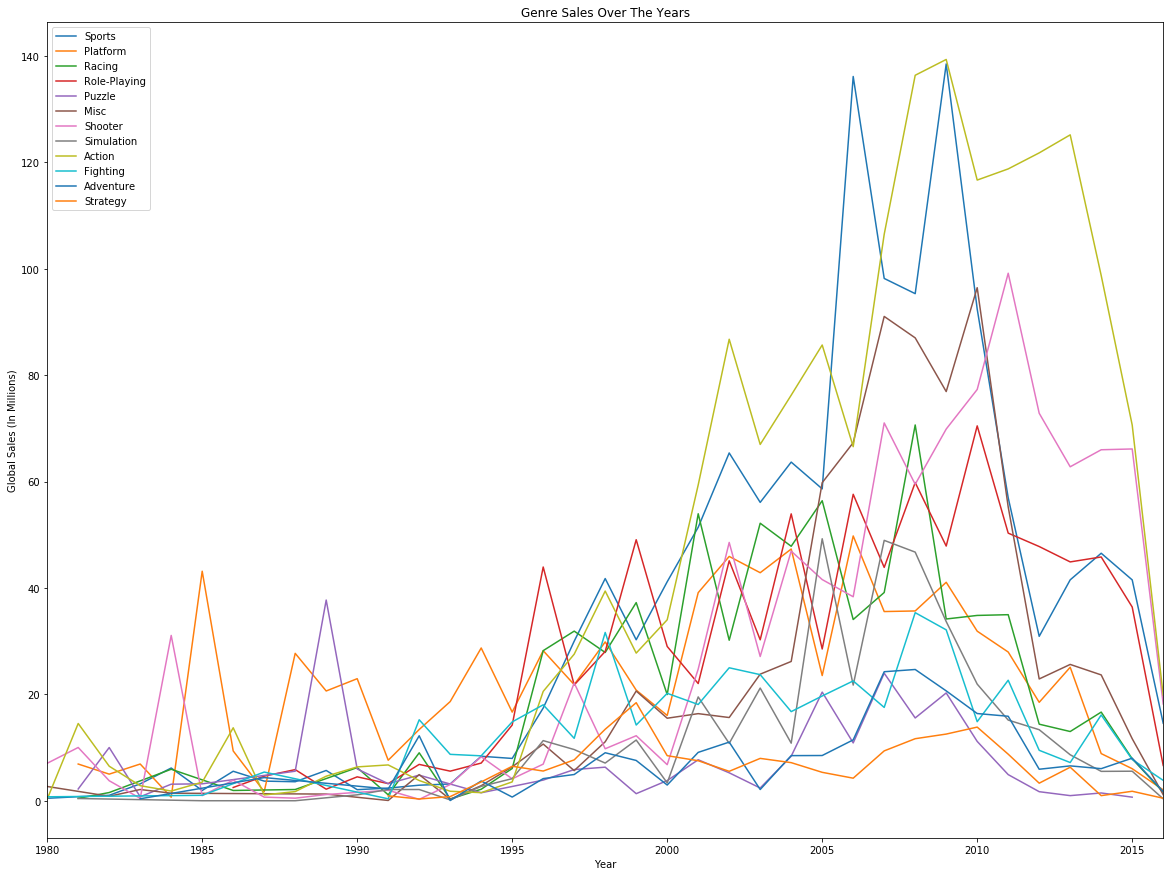

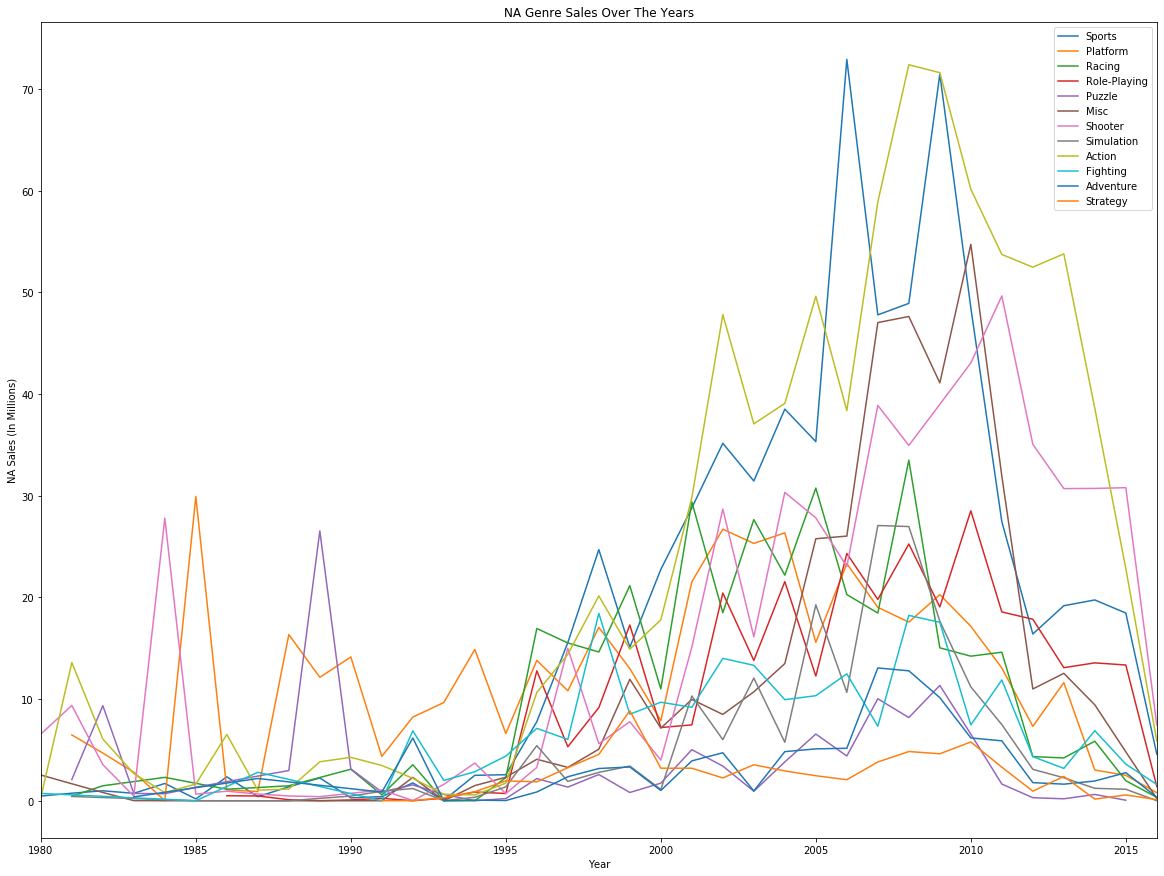

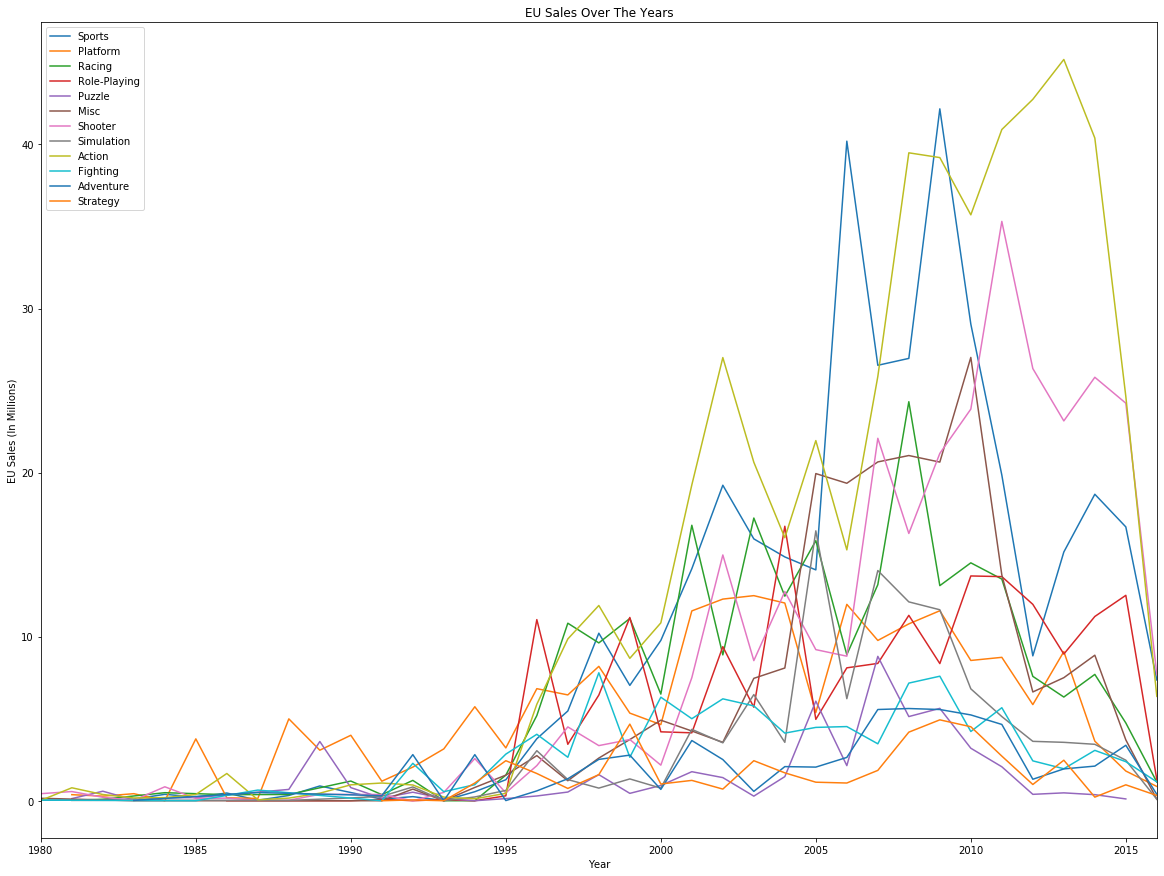

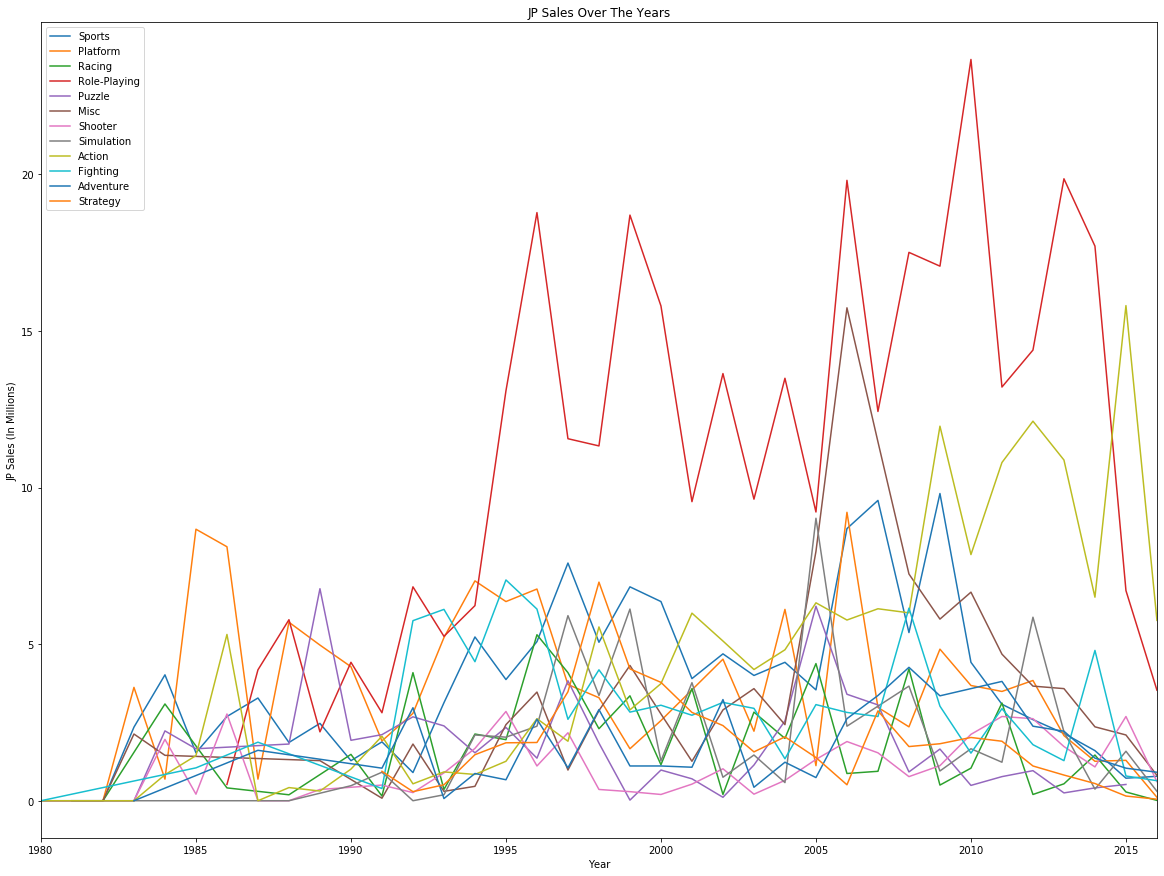

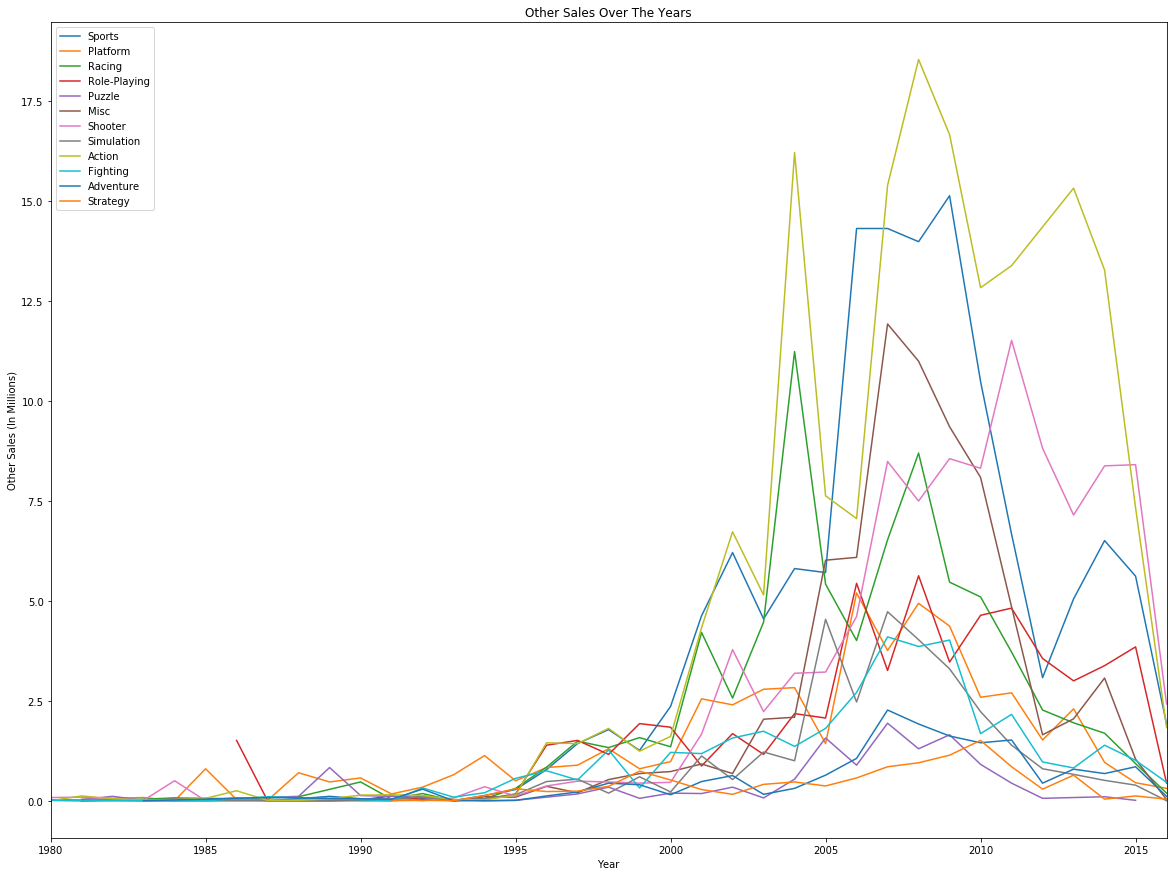

In [39]:
#chart = df.groupby('Genre').Global_Sales.sum().sort_values().plot(kind='bar', title='Global Sales Per Genre')
#chart.set_ylabel('Global Sales')

"""
Strategy         173.12
Adventure        233.75
Puzzle           241.63
Simulation       389.54
Fighting         444.01
Racing           724.81
Misc             787.79
Platform         828.84
Role-Playing     920.52
Shooter         1025.94
Sports          1308.13
Action          1719.91
"""

#chart = df['Genre'].value_counts().sort_values().plot(kind='bar', title='Number of Games Per Genre')
#chart.set_ylabel('Number of Games')

"""
Puzzle           558
Strategy         664
Fighting         835
Simulation       842
Platform         870
Racing          1222
Adventure       1261
Shooter         1279
Role-Playing    1455
Misc            1671
Sports          2297
Action          3233
"""

df['Genre'].value_counts().sort_values().tail(2).sum() / df['Genre'].value_counts().sort_values().sum()

df['Genre'].unique()
df[df['Year'] == 1980].Genre.value_counts().sort_values()

df[df['Genre'] == 'Strategy'].groupby('Name').Global_Sales.sum().sort_values().tail(50)

df.groupby('Genre').NA_Sales.sum().sort_values()
"""
Strategy         67.83
Adventure       101.58
Puzzle          121.75
Simulation      181.48
Fighting        220.74
Role-Playing    325.20
Racing          356.85
Misc            395.83
Platform        445.89
Shooter         574.95
Sports          669.20
Action          860.51
"""

df.groupby('Genre').EU_Sales.sum().sort_values()
"""
Strategy         44.72
Puzzle           50.28
Adventure        63.66
Fighting        100.00
Simulation      112.92
Role-Playing    187.11
Platform        200.47
Misc            211.05
Racing          235.19
Shooter         310.42
Sports          371.27
Action          515.88
"""

df.groupby('Genre').JP_Sales.sum().sort_values()
"""
Shooter          38.18
Strategy         49.10
Adventure        51.60
Racing           56.19
Puzzle           56.62
Simulation       63.54
Fighting         87.11
Misc            106.58
Platform        130.65
Sports          134.76
Action          157.66
Role-Playing    348.91
"""

df.groupby('Genre').Other_Sales.sum().sort_values()
"""
Strategy         11.22
Puzzle           12.45
Adventure        16.68
Simulation       31.33
Fighting         36.19
Platform         51.49
Role-Playing     59.19
Misc             73.75
Racing           76.34
Shooter         101.89
Sports          132.52
Action          184.85
"""

df[df['Genre'] == 'Strategy'].groupby('Name').Global_Sales.sum().sort_values().tail(50)
df[df['Year'] == 1984].Genre.value_counts().sort_values()


"""
Strategy         173.12
Adventure        233.75
Puzzle           241.63
Simulation       389.54
Fighting         444.01
Racing           724.81
Misc             787.79
Platform         828.84
Role-Playing     920.52
Shooter         1025.94
Sports          1308.13
Action          1719.91
"""

#All platforms tested
df[df['Genre'] == 'Strategy'].groupby('Platform').Genre.value_counts().sort_values()


#All platforms tested
df[df['Genre'] == 'Strategy'].groupby('Publisher').Genre.value_counts().sort_values()


for n in df['Genre'].unique():
    ax = df[df['Genre'] == n].groupby('Year').Global_Sales.sum().plot(kind='line', figsize=(20,15), title="Genre Sales Over The Years")
ax.set_ylabel('Global Sales (In Millions)')
plt.legend(df['Genre'].unique())
plt.show()

for n in df['Genre'].unique():
    ax = df[df['Genre'] == n].groupby('Year').NA_Sales.sum().plot(kind='line', figsize=(20,15), title="NA Genre Sales Over The Years")
ax.set_ylabel('NA Sales (In Millions)')
plt.legend(df['Genre'].unique())
plt.show()

for n in df['Genre'].unique():
    ax = df[df['Genre'] == n].groupby('Year').EU_Sales.sum().plot(kind='line', figsize=(20,15), title="EU Sales Over The Years")
ax.set_ylabel('EU Sales (In Millions)')
plt.legend(df['Genre'].unique())
plt.show()

for n in df['Genre'].unique():
    ax = df[df['Genre'] == n].groupby('Year').JP_Sales.sum().plot(kind='line', figsize=(20,15), title="JP Sales Over The Years")
ax.set_ylabel('JP Sales (In Millions)')
plt.legend(df['Genre'].unique())
plt.show()

for n in df['Genre'].unique():
    ax = df[df['Genre'] == n].groupby('Year').Other_Sales.sum().plot(kind='line', figsize=(20,15), title="Other Sales Over The Years")
ax.set_ylabel('Other Sales (In Millions)')
plt.legend(df['Genre'].unique())
plt.show()


Platform / Publisher Per Year
- This last data analysis will be about examining the development of games and accumulation of sales of Platform and Publisher throughout the years from 1980 to 2015.

Findings:
- Apparently, from 1980-1982, the only games that were released (at least the ones that breached 100k sales) were in the Atari 2600. it wasn't until 1983 that games started being released in other platforms (in NES).
- Every 5 years, there seems to be a new trending video game platform for games to be released in. Here is the rundown of what they are:
    - 1980-1984: Atari 2600
    - 1985-1989: NES
    - 1990-1994: SNES
    - 1995-1999: PlayStation (PS)
    - 2000-2004: PS2
    - 2005-2009: DS
    - 2010-2014: PS3
    - 2015-2016: PS4
- Nearly all of the trending platforms mentioned above seem to follow a pattern: from the moment of its conception, it will rapidly increase in production, until such time that it reaches a "peak point", where it will decrease productions back down to 0 or near-0 at a similar rate that increases. This entire process happens at a certain time interval, which appears to be getting shorter and shorter over the years. Only the PS2 is defiant of this process.
    - It is also worth mentioning that this same process/graph shape is also similar in its video game sales.
    - Likewise, it is worth mentioning that non-trending platforms will either follow this pattern but die much faster than tranding ones, or they will keep fluctuating constantly until their production halts entirely (for both game production and sales).
- As shown in the graphs below, gaming platforms do not start nor stop producing games at the same time. Rather, it is dependent on the conception of the platform, as well as the current trend for the specific year to dictate if games for a certain platform are still in demand.
- Despite not producing the most games, Nintendo has dominated Global Video Game Sales in all regions (except in the rest of the world) constantly since 1983. Except in Japan, it has been competing primarily against Electronic Arts.
- EA has remain in the Top 5 Game-Selling Publishers since 1995. Konami has also remained in the Top-5, but only from 1995-2009.

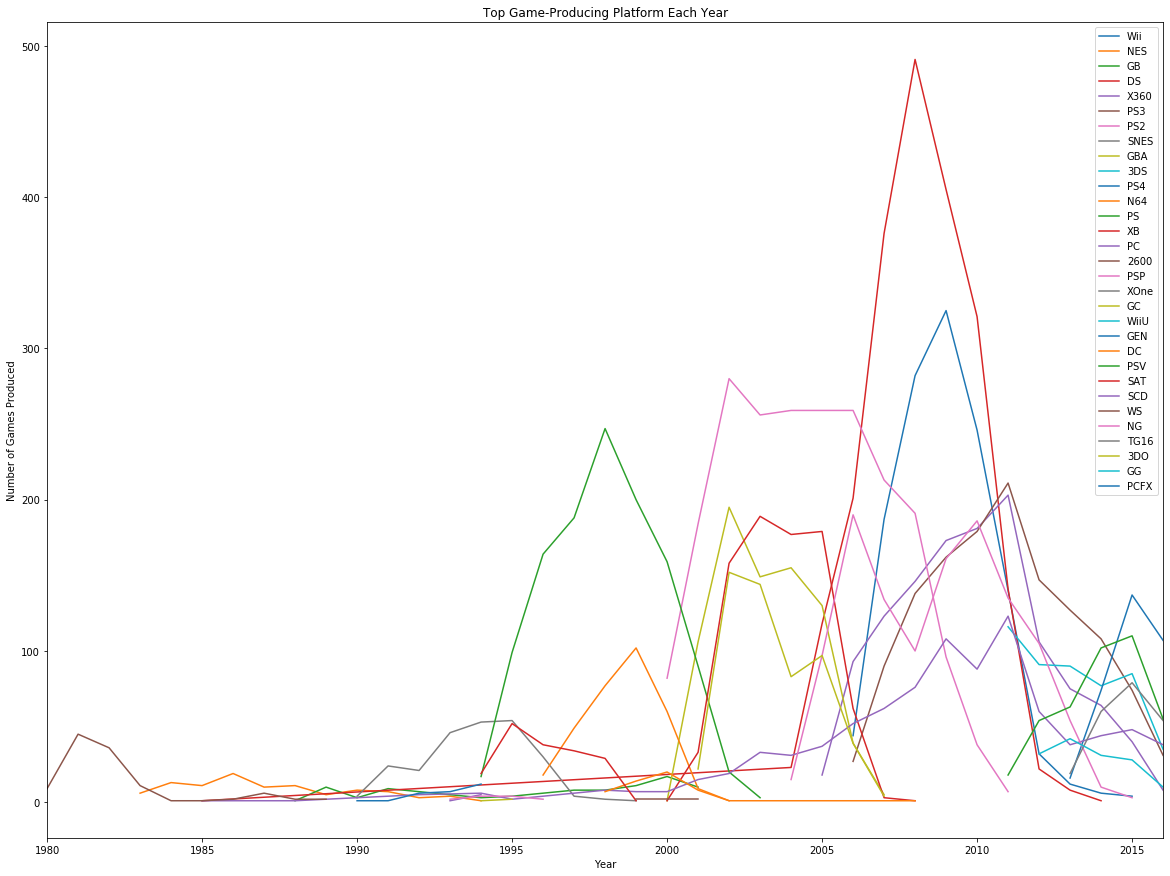

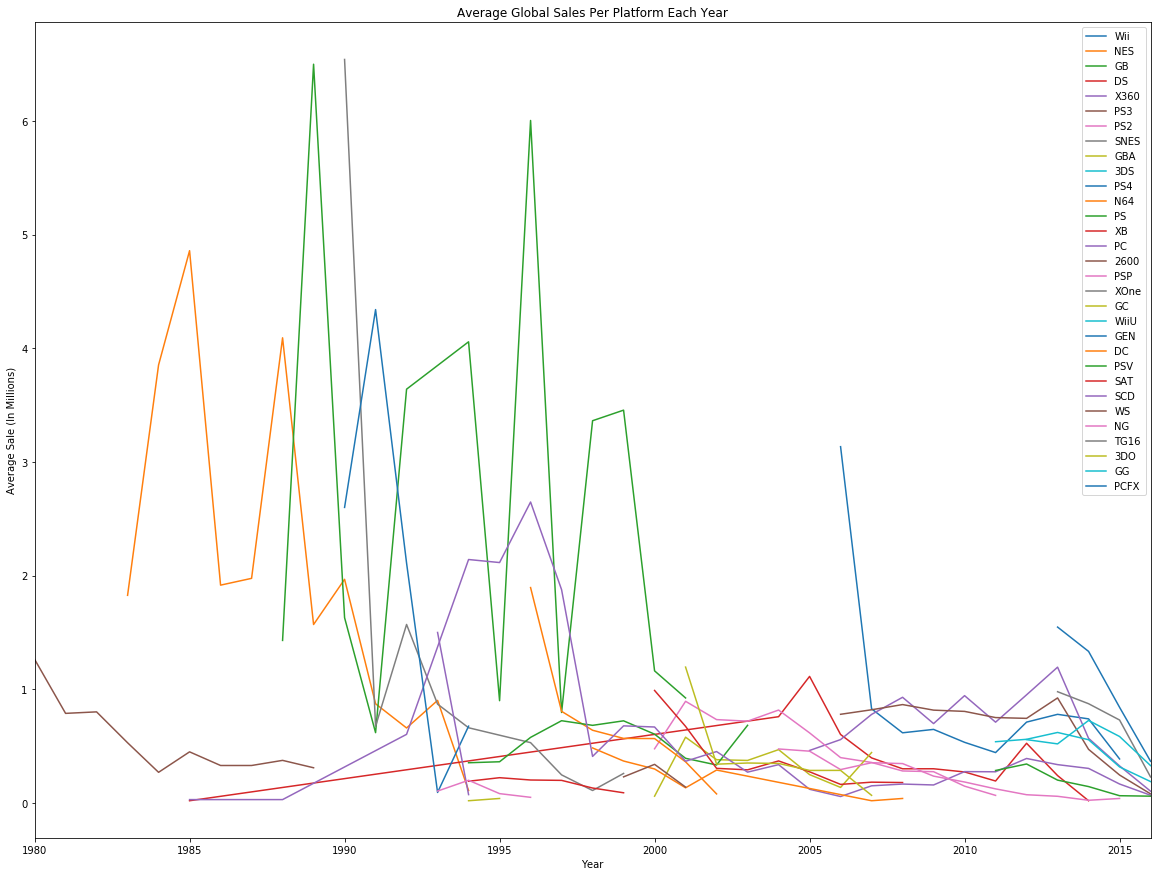

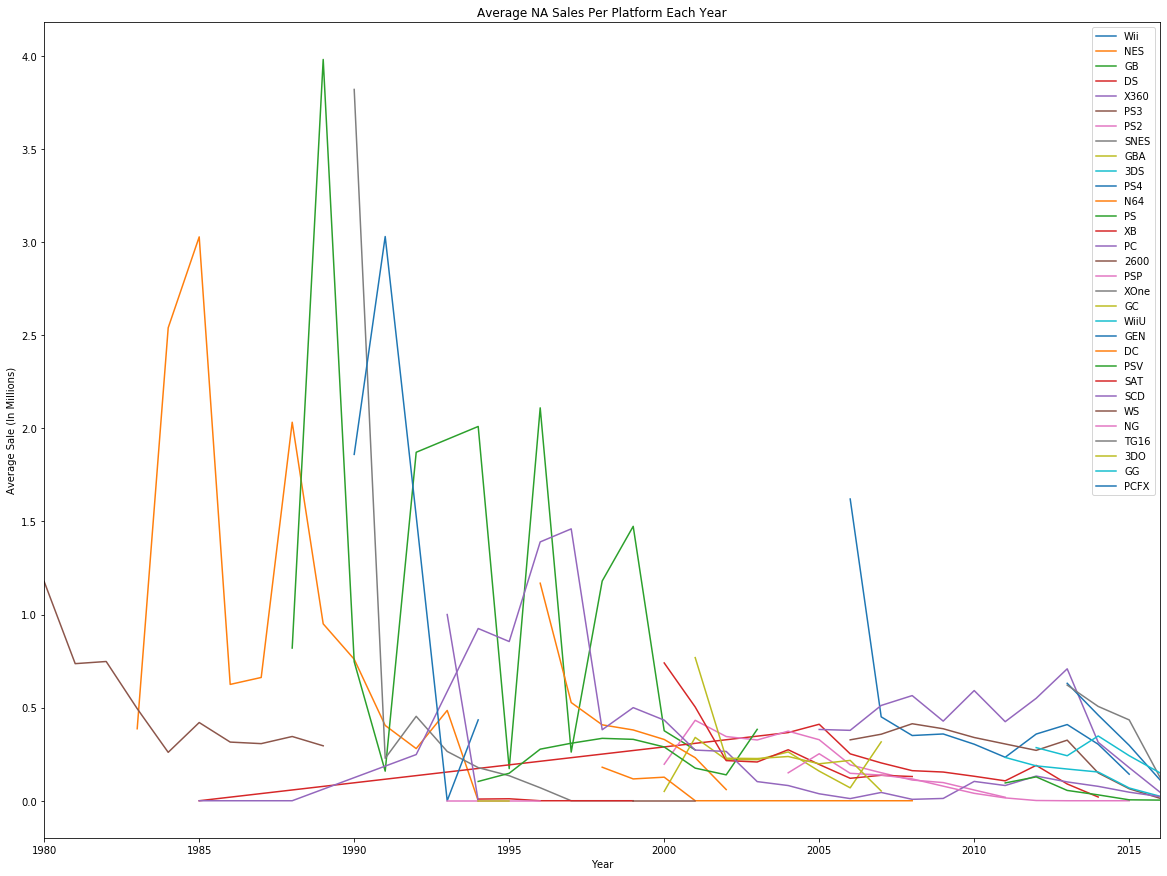

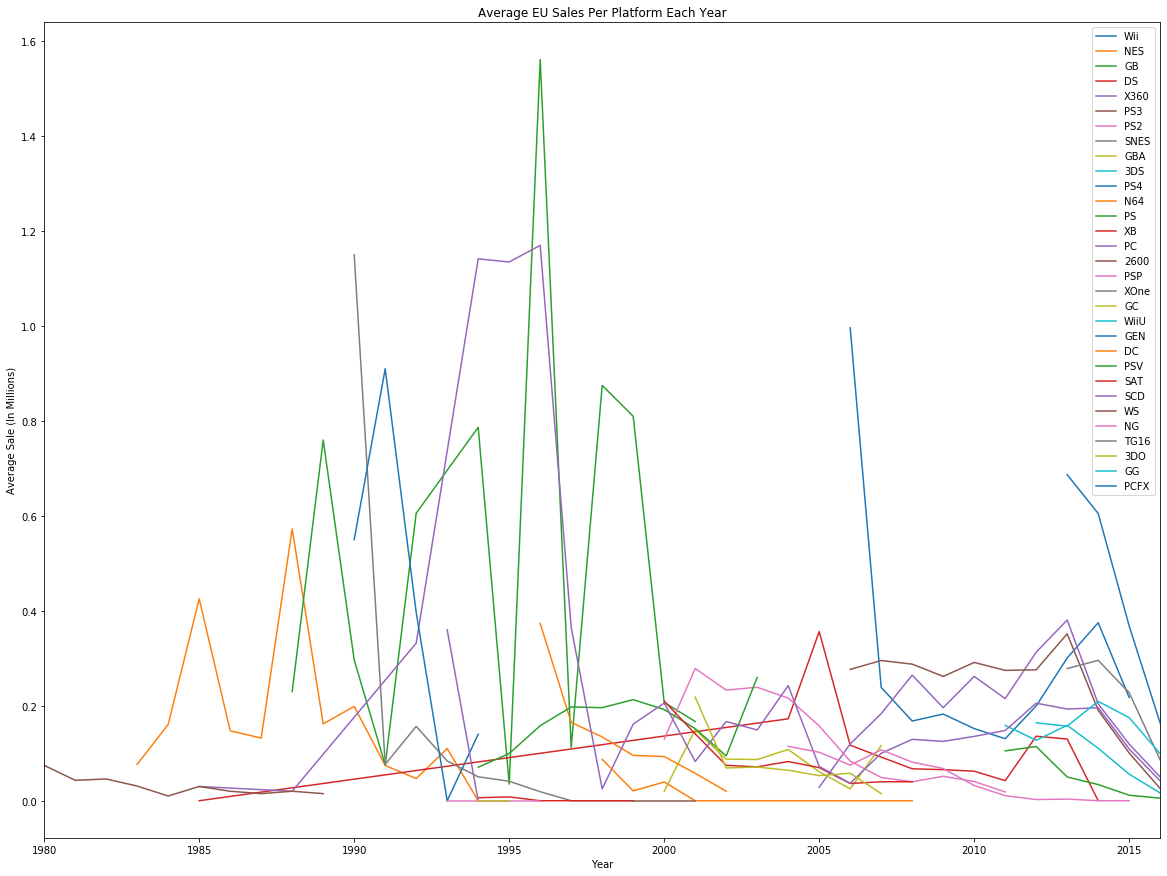

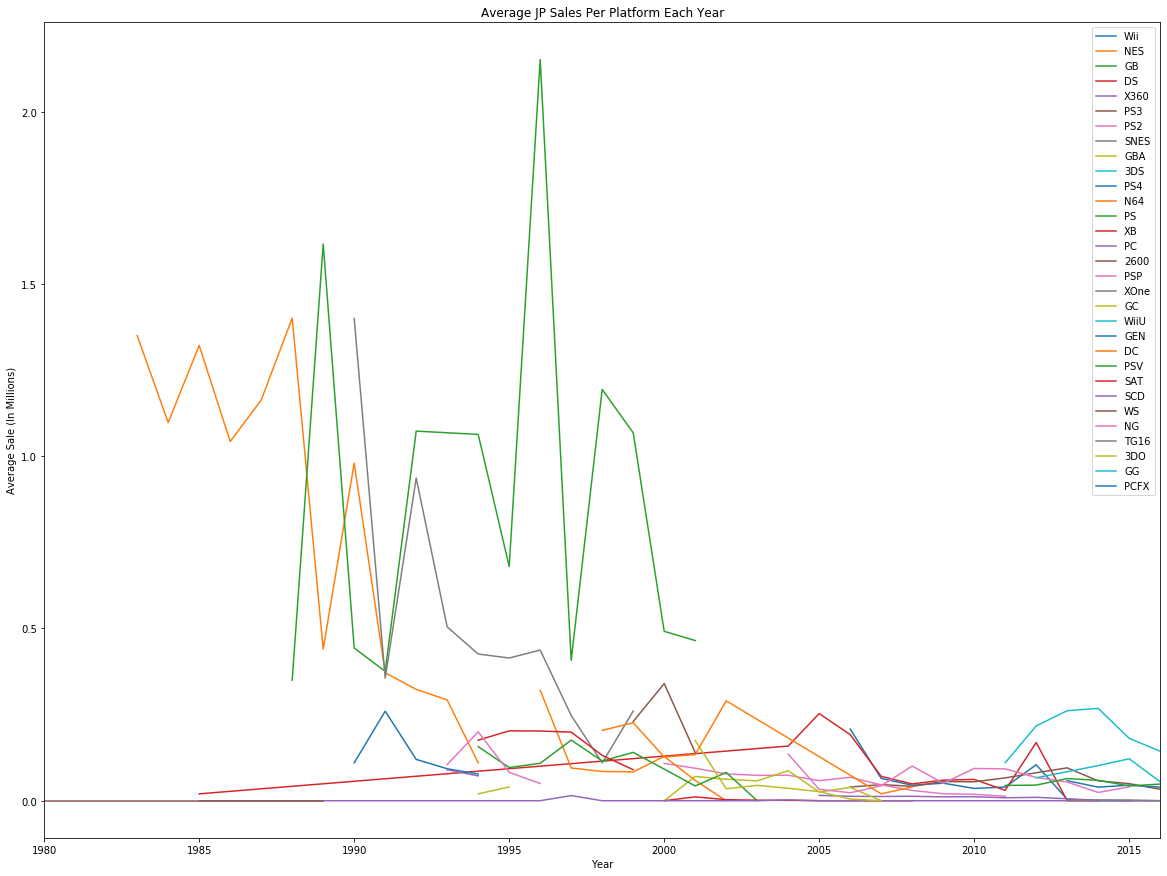

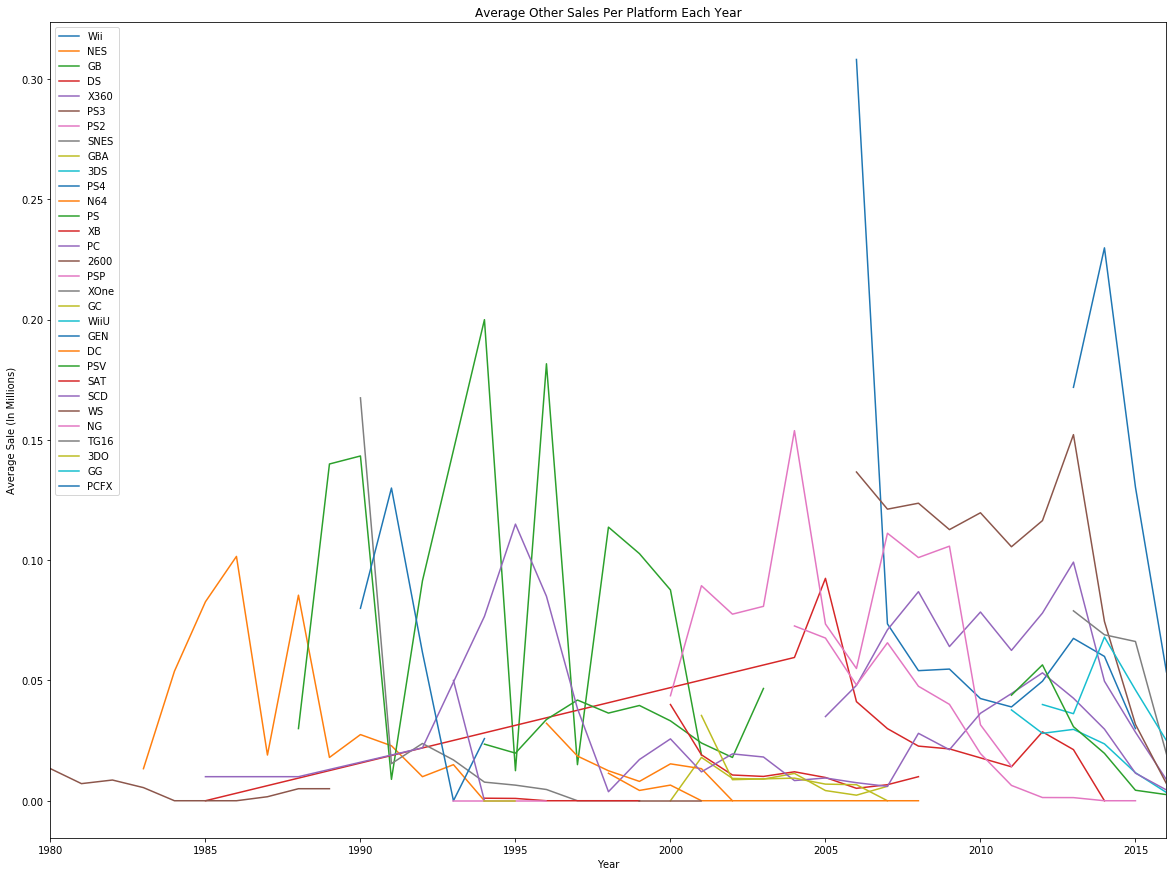

In [69]:
df[(df['Year'] >= 1980) & (df['Year'] <= 1994)].groupby('Year').Platform.value_counts().head(50)

#In checking, I will be doing it every 5 years
df[(df['Year'] >= 1980) & (df['Year'] <= 1984)].Platform.value_counts().head(50)
"""
2600    102
NES      19
"""

df[(df['Year'] >= 1985) & (df['Year'] <= 1989)].Platform.value_counts().head(50)
"""
2600        13
DS           1
GB          11
NES         56
PC           2
"""

df[(df['Year'] >= 1990) & (df['Year'] <= 1994)].Platform.value_counts().head(50)
"""
SNES    148
GEN      27
NES      23
GB       22
SAT      19
PS       17
PC       11
NG        6
SCD       6
3DO       1
GG        1
"""

df[(df['Year'] >= 1995) & (df['Year'] <= 1999)].Platform.value_counts().head(50)
"""
PS      898
N64     246
SAT     154
SNES     91
GB       37
PC       27
DC       21
NG        6
3DO       2
TG16      2
WS        2
PCFX      1
"""

df[(df['Year'] >= 2000) & (df['Year'] <= 2004)].Platform.value_counts().head(50)
"""
PS2    1061
GBA     606
XB      558
GC      401
PS      272
PC      105
N64      70
DC       29
GB       27
DS       23
PSP      15
WS        4
"""

df[(df['Year'] >= 2005) & (df['Year'] <= 2009)].Platform.value_counts().head(50)
"""
DS      1591
PS2     1018
Wii      838
PSP      682
X360     553
PS3      417
PC       335
XB       245
GBA      174
GC       140
DC         2
"""

df[(df['Year'] >= 2010) & (df['Year'] <= 2014)].Platform.value_counts().head(50)
"""
PS3     772
X360    629
DS      493
PSP     490
Wii     436
3DS     374
PC      353
PSV     237
WiiU    105
PS4      90
XOne     79
PS2      45
"""

df[(df['Year'] >= 2015) & (df['Year'] <= 2016)].Platform.value_counts().head(50)
"""
PS4     244
PSV     165
XOne    133
3DS     120
PS3     105
PC       86
X360     48
WiiU     38
Wii       4
PSP       3
"""

"""
fig, ax = plt.subplots(figsize = (10,15))
groups = df.groupby('Platform')

for name, group in groups:
    ax.plot(group.Year, group.Global_Sales.sum(), marker='o', linestyle='', ms=4, label = name)
ax.legend(numpoints=1)
ax.set_ylim((0, 90))

ax.set_title('GDP Per Capita- Suicide Rate Correlation Per Generation In Year 2015')
ax.set_xlabel('GDP Per Capita (In Dollars)')
ax.set_ylabel('Suicides Per 100k People')
"""

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').Rank.count().plot(figsize=(20,15), title='Top Game-Producing Platform Each Year')
ax.set_ylabel('Number of Games Produced')
#I used rank here because any column name will do. Also if not, it will print the statistics of all the columns

plt.legend(df['Platform'].unique())
plt.show()

"""
for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').Global_Sales.sum().plot(figsize=(20,15), title='Global Sales Per Platform Each Year')
ax.set_ylabel('Total Sales (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()


for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').NA_Sales.sum().plot(figsize=(20,15), title='NA Sales Per Platform Each Year')
ax.set_ylabel('Total Sales (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').EU_Sales.sum().plot(figsize=(20,15), title='EU Sales Per Platform Each Year')
ax.set_ylabel('Total Sales (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').JP_Sales.sum().plot(figsize=(20,15), title='JP Sales Per Platform Each Year')
ax.set_ylabel('Total Sales (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').Other_Sales.sum().plot(figsize=(20,15), title='Other Sales Per Platform Each Year')
ax.set_ylabel('Total Sales (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()
"""

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').Global_Sales.mean().plot(figsize=(20,15), title='Average Global Sales Per Platform Each Year')
ax.set_ylabel('Average Sale (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()


for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').NA_Sales.mean().plot(figsize=(20,15), title='Average NA Sales Per Platform Each Year')
ax.set_ylabel('Average Sale (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').EU_Sales.mean().plot(figsize=(20,15), title='Average EU Sales Per Platform Each Year')
ax.set_ylabel('Average Sale (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').JP_Sales.mean().plot(figsize=(20,15), title='Average JP Sales Per Platform Each Year')
ax.set_ylabel('Average Sale (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

for n in df['Platform'].unique():
    ax = df[df['Platform'] == n].groupby('Year').Other_Sales.mean().plot(figsize=(20,15), title='Average Other Sales Per Platform Each Year')
ax.set_ylabel('Average Sale (In Millions)')

plt.legend(df['Platform'].unique())
plt.show()

In [230]:
df[(df['Year'] >= 1980) & (df['Year'] <= 1984)].Publisher.value_counts().head(5)
"""
Atari                 35
Activision            19
Nintendo              15
Mattel Interactive     8
Parker Bros.           7
"""

df[(df['Year'] >= 1985) & (df['Year'] <= 1989)].Publisher.value_counts().head(5)
"""
Nintendo              32
Namco Bandai Games     9
Capcom                 8
Atari                  7
Activision             7
"""

df[(df['Year'] >= 1990) & (df['Year'] <= 1994)].Publisher.value_counts().head(5)
"""
Nintendo                        47
Sega                            39
Namco Bandai Games              21
Capcom                          18
Konami Digital Entertainment    18
"""

df[(df['Year'] >= 1995) & (df['Year'] <= 1999)].Publisher.value_counts().head(5)
"""
Sony Computer Entertainment     148
Electronic Arts                 105
Konami Digital Entertainment    101
Nintendo                         77
Sega                             76
"""

df[(df['Year'] >= 2000) & (df['Year'] <= 2004)].Publisher.value_counts().head(5)
"""
Electronic Arts                 333
THQ                             219
Konami Digital Entertainment    194
Ubisoft                         169
Activision                      167
"""

df[(df['Year'] >= 2005) & (df['Year'] <= 2009)].Publisher.value_counts().head(5)
"""
Electronic Arts                 558
Ubisoft                         420
Activision                      404
THQ                             327
Konami Digital Entertainment    306
"""

df[(df['Year'] >= 2010) & (df['Year'] <= 2014)].Publisher.value_counts().head(5)
"""
Namco Bandai Games              363
Electronic Arts                 288
Activision                      286
Ubisoft                         264
Konami Digital Entertainment    178
"""

df[(df['Year'] >= 2015) & (df['Year'] <= 2016)].Publisher.value_counts().head(5)
"""
Namco Bandai Games    108
Activision             53
Electronic Arts        52
Tecmo Koei             52
Ubisoft                45
"""

df[(df['Year'] >= 2015) & (df['Year'] <= 2016)].Publisher.value_counts().head(5)

#Namco Bandai Games    108
#Activision             53
#Electronic Arts        52
#Tecmo Koei             52
#Ubisoft                45

#for n in df.Publisher.value_counts().sort_values().head(10)
#    df[df['Publisher'] == 'n'].groupby('Year').count().plot(title = n)
    
#df[df['Publisher'] == 'Namco Bandai Games'].groupby('Year').count().plot()
#df[df['Publisher'] == 'Activision'].groupby('Year').count().plot()
#df[df['Publisher'] == 'Electronic Arts'].groupby('Year').count().plot()
#df[df['Publisher'] == 'Tecmo Koei'].groupby('Year').count().plot()
#df[df['Publisher'] == 'Ubisoft'].groupby('Year').count().plot(title='Ubisoft')
df.Publisher.value_counts().head(10)

"""
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
"""

array = ['Electronic Arts','Activision','Namco Bandai Games', 'Ubisoft','Konami Digital Entertainment','THQ','Nintendo'
        ,'Sony Computer Entertainment','Sega','Take-Two Interactive']
"""
for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').Rank.count().plot(figsize=(20,15), title='Top Game-Producing Publisher Each Year')
#I used rank here because any column name will do. Also if not, it will print the statistics of all the columns
ax.set_ylabel('Number of Games Produced')
plt.legend(array)
plt.show()
"""

"""
for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').Global_Sales.sum().plot(figsize=(20,15), title='Global Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Total Sales (In Millions)')
plt.legend(array)
plt.show()


for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').NA_Sales.sum().plot(figsize=(20,15), title='NA Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Total Sales (In Millions)')
plt.legend(array)
plt.show()

for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').EU_Sales.sum().plot(figsize=(20,15), title='EU Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Total Sales (In Millions)')
plt.legend(array)
plt.show()

for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').JP_Sales.sum().plot(figsize=(20,15), title='JP Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Total Sales (In Millions)')
plt.legend(array)
plt.show()

for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').Other_Sales.sum().plot(figsize=(20,15), title='Other Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Total Sales (In Millions)')
plt.legend(array)
plt.show()
"""

"""
for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').Global_Sales.mean().plot(figsize=(20,15), title='Average Global Sale Of the Top 10 Publishers Each Year')
ax.set_ylabel('Average Sale (In Millions)')
plt.legend(array)
plt.show()


for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').NA_Sales.mean().plot(figsize=(20,15), title='Average NA Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Average Sale (In Millions)')
plt.legend(array)
plt.show()

for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').EU_Sales.mean().plot(figsize=(20,15), title='Average EU Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Average Sale (In Millions)')
plt.legend(array)
plt.show()

for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').JP_Sales.mean().plot(figsize=(20,15), title='Average JP Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Average Sale (In Millions)')
plt.legend(array)
plt.show()

for n in array:
    ax = df[df['Publisher'] == n].groupby('Year').Other_Sales.mean().plot(figsize=(20,15), title='Average Other Sales Of the Top 10 Publishers Each Year')
ax.set_ylabel('Average Sale (In Millions)')
plt.legend(array)
plt.show()
"""
df.groupby('Publisher').Global_Sales.sum().sort_values().tail(10)

Publisher
Namco Bandai Games               253.65
Sega                             270.66
Konami Digital Entertainment     278.56
THQ                              340.44
Take-Two Interactive             399.30
Ubisoft                          473.25
Sony Computer Entertainment      607.28
Activision                       721.41
Electronic Arts                 1093.39
Nintendo                        1784.43
Name: Global_Sales, dtype: float64

In [ ]:
<b><h1>Data Visualization</b></h1>

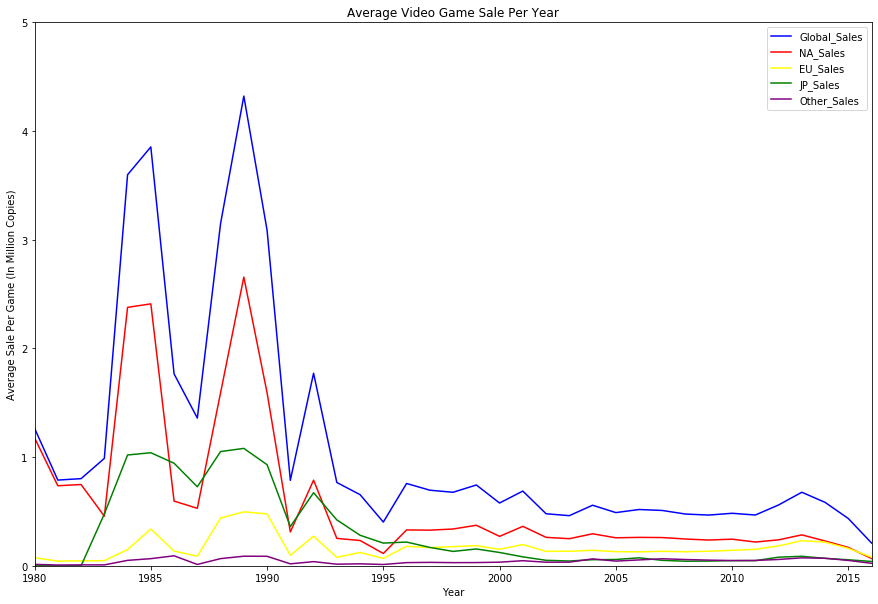

In [102]:
df.groupby('Year').Global_Sales.sum()

gsales = df.groupby('Year').Global_Sales.mean()
nasales = df.groupby('Year').NA_Sales.mean()
eusales = df.groupby('Year').EU_Sales.mean()
jpsales = df.groupby('Year').JP_Sales.mean()
osales = df.groupby('Year').Other_Sales.mean()

chart = gsales.plot(color = 'blue', figsize=(15,10))
chart = nasales.plot(color = 'red', figsize=(15,10))
chart = eusales.plot(color = 'yellow', figsize=(15,10))
chart = jpsales.plot(color = 'green', figsize=(15,10))
chart = osales.plot(color = 'purple', figsize=(15,10))

chart.set_title("Average Video Game Sale Per Year")
chart.set_ylabel('Average Sale Per Game (In Million Copies)')
chart.set_xlim(1980, 2016)
chart.set_ylim(0,5)

plt.legend(['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

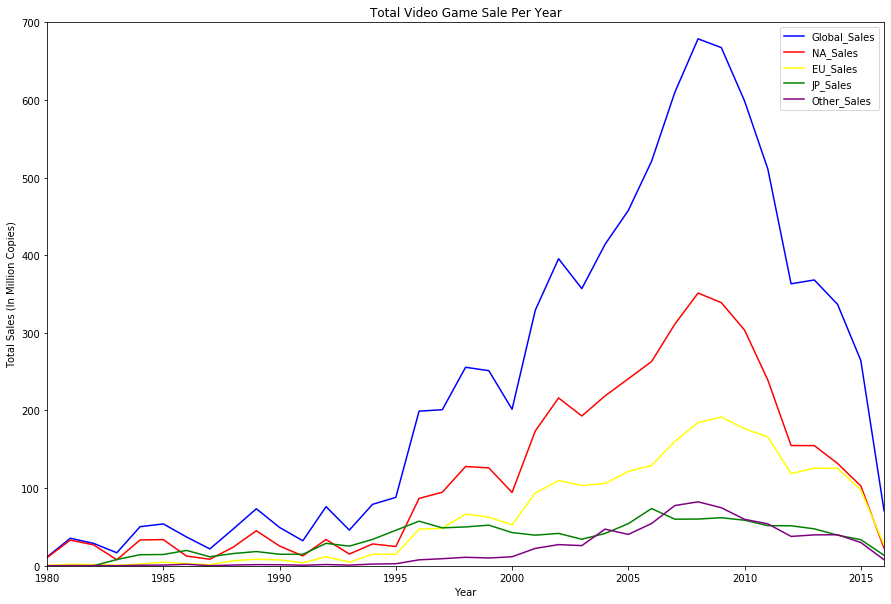

In [103]:
df.groupby('Year').Global_Sales.sum()

gsales = df.groupby('Year').Global_Sales.sum()
nasales = df.groupby('Year').NA_Sales.sum()
eusales = df.groupby('Year').EU_Sales.sum()
jpsales = df.groupby('Year').JP_Sales.sum()
osales = df.groupby('Year').Other_Sales.sum()

chart = gsales.plot(color = 'blue', figsize=(15,10))
chart = nasales.plot(color = 'red', figsize=(15,10))
chart = eusales.plot(color = 'yellow', figsize=(15,10))
chart = jpsales.plot(color = 'green', figsize=(15,10))
chart = osales.plot(color = 'purple', figsize=(15,10))

chart.set_title("Total Video Game Sale Per Year")
chart.set_ylabel('Total Sales (In Million Copies)')
chart.set_xlim(1980, 2016)
chart.set_ylim(0,700)

plt.legend(['Global_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

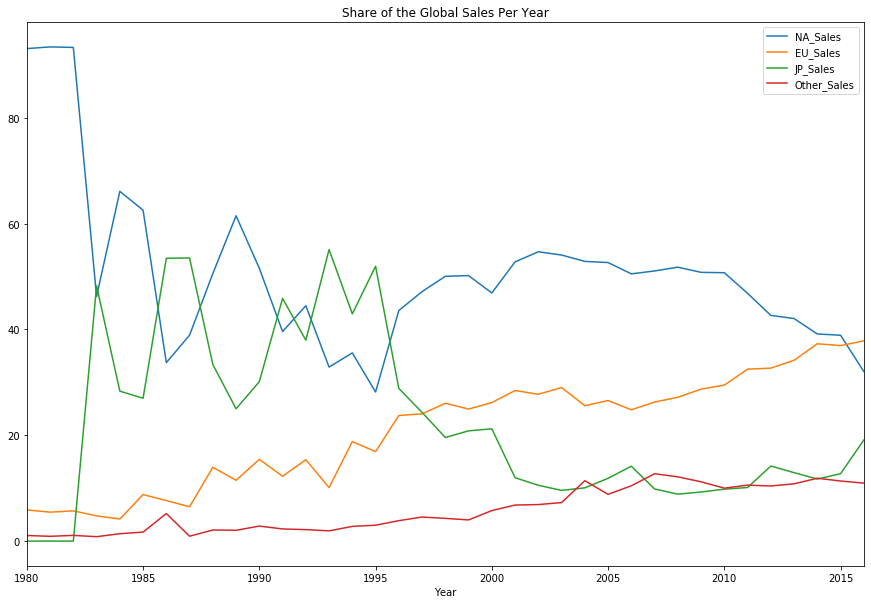

In [109]:
na = df.groupby('Year').NA_Sales.sum() / df.groupby('Year').Global_Sales.sum() * 100
eu = df.groupby('Year').EU_Sales.sum() / df.groupby('Year').Global_Sales.sum() * 100
jp = df.groupby('Year').JP_Sales.sum() / df.groupby('Year').Global_Sales.sum() * 100
ot = df.groupby('Year').Other_Sales.sum() / df.groupby('Year').Global_Sales.sum() * 100

chart = na.plot(figsize=(15,10))
chart = eu.plot(figsize=(15,10))
chart = jp.plot(figsize=(15,10))
chart = ot.plot(figsize=(15,10))

chart.set_title('Share of the Global Sales Per Year')

plt.legend(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.show()

Text(0.5, 0, 'Total Overall Sales From 1980-2016 (In Millions)')

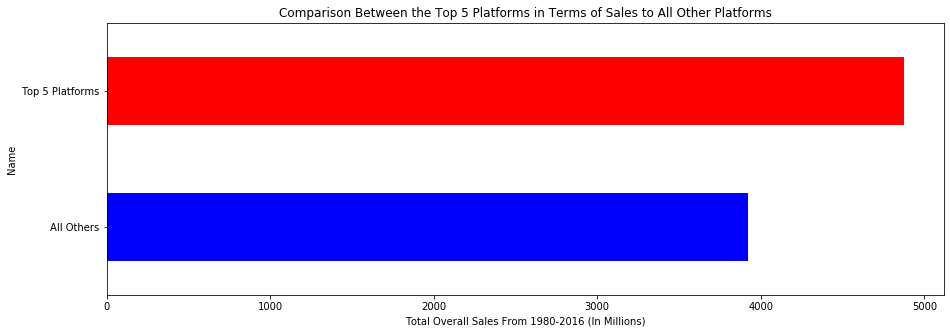

In [145]:
df[(df['Platform'] == 'PS2') | (df['Platform'] == 'X360') | 
   (df['Platform'] == 'Wii') | (df['Platform'] == 'DS') | (df['Platform'] == 'PS3')].Global_Sales.sum()
df.Global_Sales.sum()

df[(df['Platform'] != 'PS2') & (df['Platform'] != 'X360') & 
   (df['Platform'] != 'Wii') & (df['Platform'] != 'DS') & (df['Platform'] != 'PS3')].Global_Sales.sum()

#4873.87
#3924.12

#PS2     2124
#DS      2108
#PS3     1294
#Wii     1278
#X360    1230

print_df = pd.DataFrame({
    'Name': ['Top 5 Platforms','All Others'],
    'Total':[4873.87,3924.12]
})

ax = print_df.groupby('Name').Total.sum().plot(kind='barh', figsize=(15,5), color=['blue','red']
                                         ,title='Comparison Between the Top 5 Platforms in Terms of Sales to All Other Platforms')
ax.set_xlabel('Total Overall Sales From 1980-2016 (In Millions)')

Text(0.5, 0, 'Number of Top 30 Games')

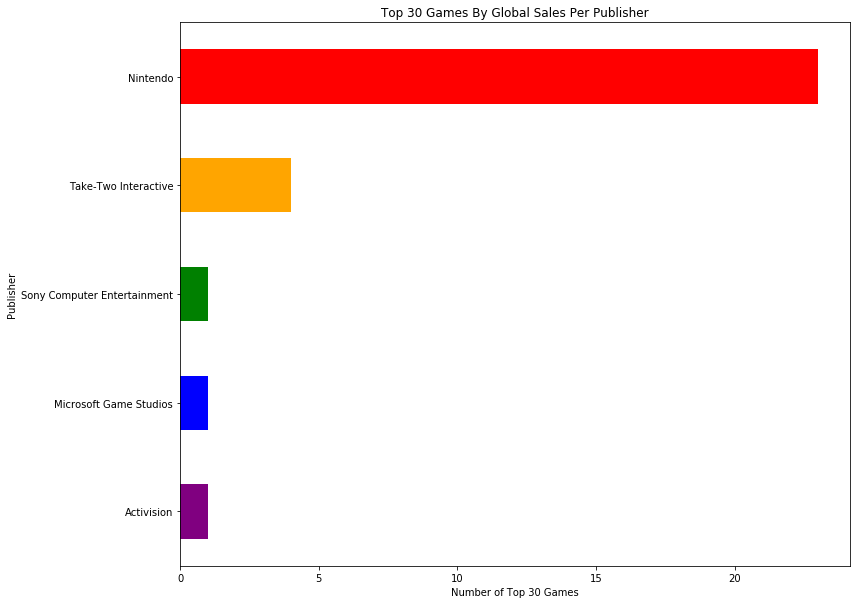

In [176]:
ax = df[df['Rank'] <= 30].groupby('Publisher').Rank.count().sort_values().plot(kind='barh', 
                                            color=['purple','blue','green','orange','red'], figsize=(12,10))
ax.set_title('Top 30 Games By Global Sales Per Publisher')
ax.set_xlabel('Number of Top 30 Games')

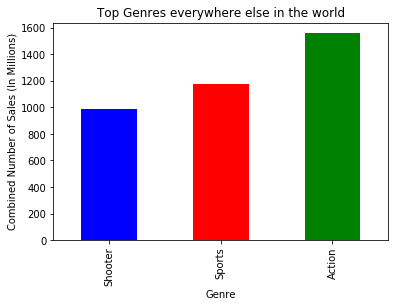

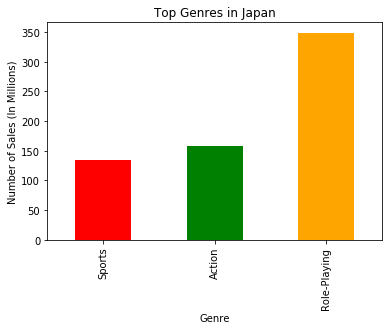

In [358]:
chart = df.groupby('Genre').NA_Sales.sum().sort_values().tail(3) + df.groupby('Genre').EU_Sales.sum().sort_values().tail(3) + df.groupby('Genre').Other_Sales.sum().sort_values().tail(3)
ax = chart.plot(kind='bar', color=['blue','red','green'], title='Top Genres everywhere else in the world')
ax.set_ylabel('Combined Number of Sales (In Millions)')
plt.show()

jchart = df.groupby('Genre').JP_Sales.sum().sort_values().tail(3)
bx = jchart.plot(kind='bar', color=['red','green','orange'], title='Top Genres in Japan')
bx.set_ylabel('Number of Sales (In Millions)')

plt.show()

(1995, 2016)

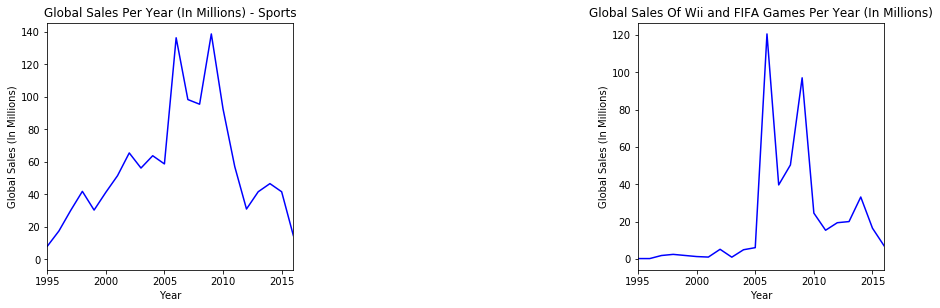

In [365]:
fig = plt.figure(figsize = (15,10))
p = fig.add_subplot(231)

sports = df[df['Genre'] == 'Sports'].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='blue')
p.set_title('Global Sales Per Year (In Millions) - Sports')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1995, 2016)

p = fig.add_subplot(233)
sports = df[(df['Name'].str.contains('Wii')) | (df['Name'].str.contains('FIFA'))].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='blue')
p.set_title('Global Sales Of Wii and FIFA Games Per Year (In Millions)')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1995,2016)

(1985, 2016)

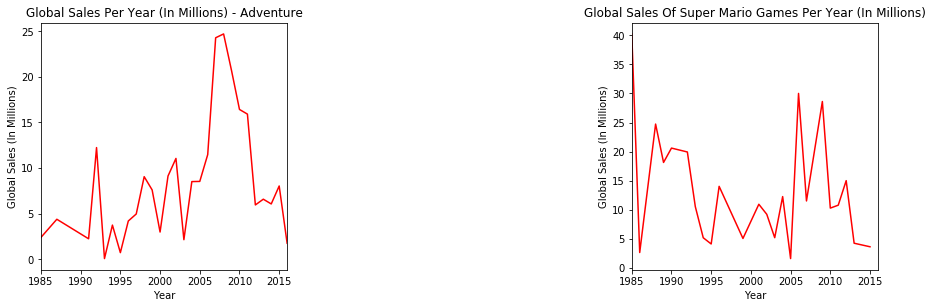

In [364]:
fig = plt.figure(figsize = (15,10))
p = fig.add_subplot(231)

sports = df[df['Genre'] ==  'Adventure'].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='red')
p.set_title('Global Sales Per Year (In Millions) - Adventure')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1985, 2016)

p = fig.add_subplot(233)
sports = df[(df['Name'].str.contains('Super Mario'))].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='red')
p.set_title('Global Sales Of Super Mario Games Per Year (In Millions)')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1985,2016)

(1992, 2016)

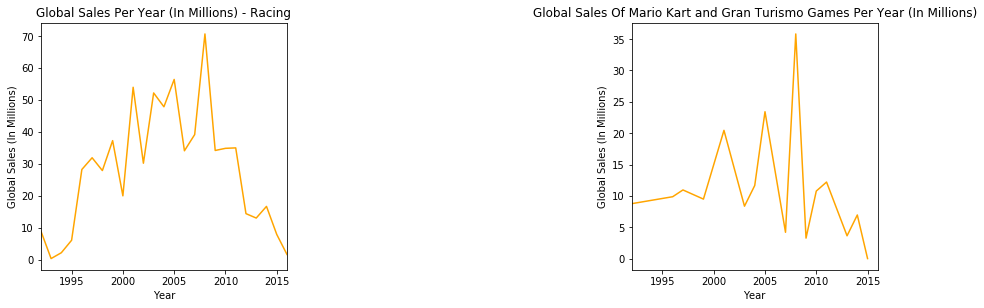

In [363]:
fig = plt.figure(figsize = (15,10))
p = fig.add_subplot(231)

sports = df[df['Genre'] ==  'Racing'].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='orange')
p.set_title('Global Sales Per Year (In Millions) - Racing')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1992, 2016)

p = fig.add_subplot(233)
sports = df[(df['Name'].str.contains('Mario Kart')) | (df['Name'].str.contains('Gran Turismo'))].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='orange')
p.set_title('Global Sales Of Mario Kart and Gran Turismo Games Per Year (In Millions)')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1992,2016)

(1995, 2016)

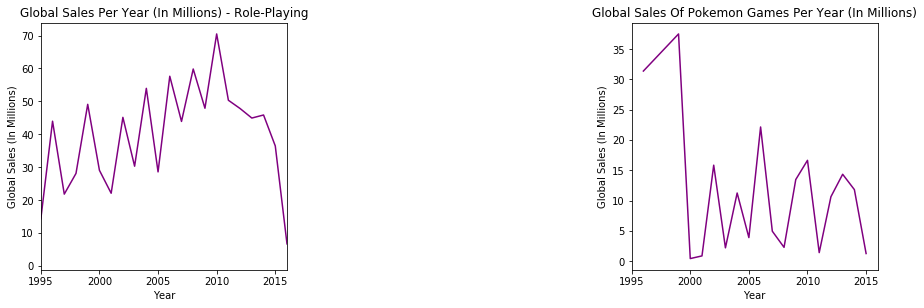

In [362]:
fig = plt.figure(figsize = (15,10))
p = fig.add_subplot(231)

sports = df[df['Genre'] ==  'Role-Playing'].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='purple')
p.set_title('Global Sales Per Year (In Millions) - Role-Playing')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1995, 2016)

p = fig.add_subplot(233)
sports = df[(df['Name'].str.contains('Pokemon'))].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='purple')
p.set_title('Global Sales Of Pokemon Games Per Year (In Millions)')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(1995,2016)

(2005, 2016)

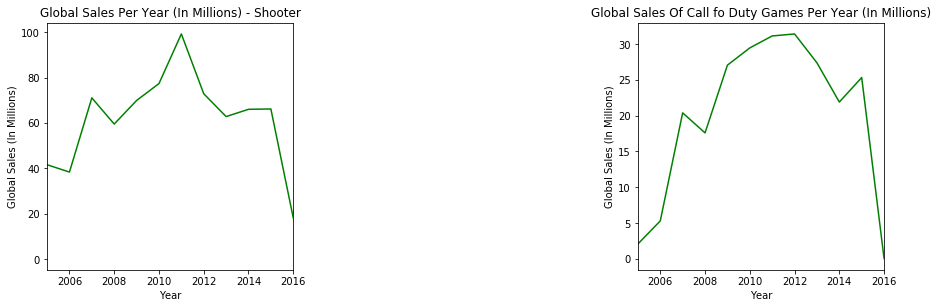

In [361]:
fig = plt.figure(figsize = (15,10))
p = fig.add_subplot(231)

sports = df[df['Genre'] ==  'Shooter'].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='green')
p.set_title('Global Sales Per Year (In Millions) - Shooter')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(2005, 2016)

p = fig.add_subplot(233)
sports = df[(df['Name'].str.contains('Call of Duty'))].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='green')
p.set_title('Global Sales Of Call fo Duty Games Per Year (In Millions)')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(2005,2016)

(2000, 2016)

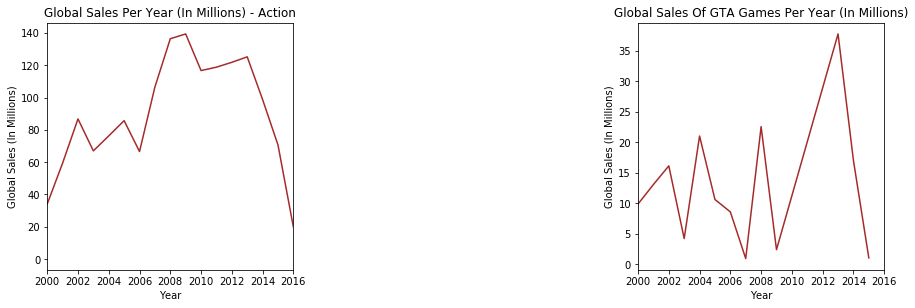

In [360]:
fig = plt.figure(figsize = (15,10))
p = fig.add_subplot(231)

sports = df[df['Genre'] ==  'Action'].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='brown')
p.set_title('Global Sales Per Year (In Millions) - Action')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(2000, 2016)

p = fig.add_subplot(233)
sports = df[(df['Name'].str.contains('GTA')) | (df['Name'].str.contains('Grand Theft Auto'))].groupby('Year').Global_Sales.sum()
plt.plot(sports, color='brown')
p.set_title('Global Sales Of GTA Games Per Year (In Millions)')
p.set_ylabel('Global Sales (In Millions)')
p.set_xlabel('Year')
p.set_xlim(2000,2016)

(2006, 2016)

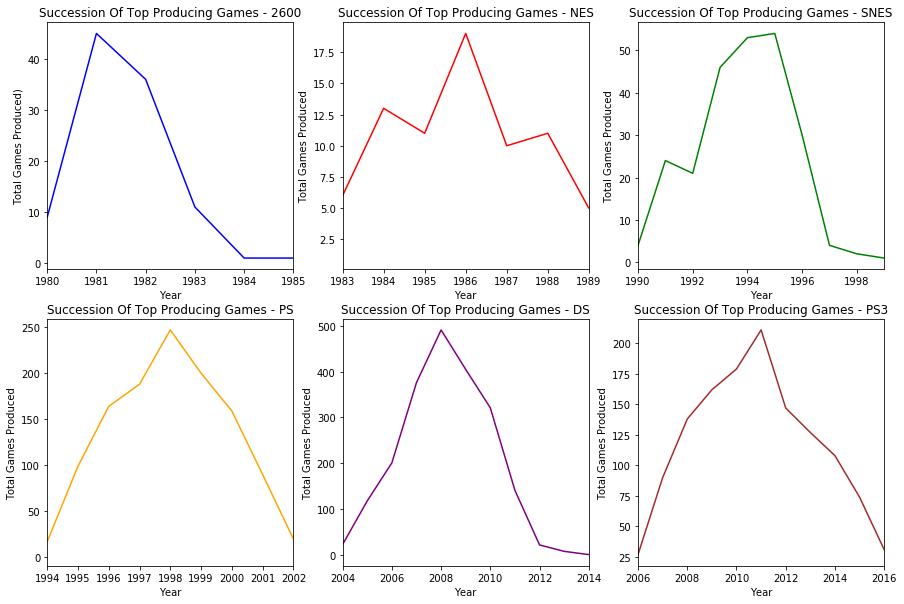

In [359]:
#Notice the Shape of the Top Platforms

fig = plt.figure(figsize = (15,10))

p = fig.add_subplot(231)
ax = df[df['Platform'] == '2600'].groupby('Year').Rank.count()
plt.plot(ax, color='blue')
p.set_title('Succession Of Top Producing Games - 2600')
p.set_ylabel('Total Games Produced)')
p.set_xlabel('Year')
p.set_xlim(1980, 1985)

p = fig.add_subplot(232)
ax = df[df['Platform'] == 'NES'].groupby('Year').Rank.count()
plt.plot(ax, color='red')
p.set_title('Succession Of Top Producing Games - NES')
p.set_ylabel('Total Games Produced')
p.set_xlabel('Year')
p.set_xlim(1983,1989)

p = fig.add_subplot(233)
ax = df[df['Platform'] == 'SNES'].groupby('Year').Rank.count()
plt.plot(ax, color='green')
p.set_title('Succession Of Top Producing Games - SNES')
p.set_ylabel('Total Games Produced')
p.set_xlabel('Year')
p.set_xlim(1990,1999)

p = fig.add_subplot(234)
ax = df[df['Platform'] == 'PS'].groupby('Year').Rank.count()
plt.plot(ax, color='orange')
p.set_title('Succession Of Top Producing Games - PS')
p.set_ylabel('Total Games Produced')
p.set_xlabel('Year')
p.set_xlim(1994,2002)

p = fig.add_subplot(235)
ax = df[df['Platform'] == 'DS'].groupby('Year').Rank.count()
plt.plot(ax, color='purple')
p.set_title('Succession Of Top Producing Games - DS')
p.set_ylabel('Total Games Produced')
p.set_xlabel('Year')
p.set_xlim(2004,2014)

p = fig.add_subplot(236)
ax = df[df['Platform'] == 'PS3'].groupby('Year').Rank.count()
plt.plot(ax, color='brown')
p.set_title('Succession Of Top Producing Games - PS3')
p.set_ylabel('Total Games Produced')
p.set_xlabel('Year')
p.set_xlim(2006,2016)

Text(0.5, 0, 'Total Number of Games')

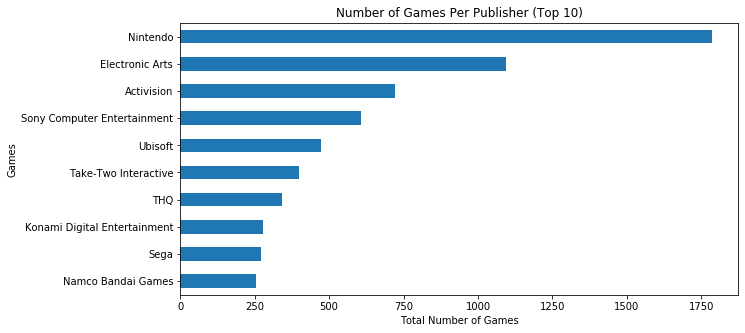

In [352]:
chart = df.groupby('Publisher').Global_Sales.sum().sort_values().tail(10).plot(kind = 'barh', figsize = (10,5))
chart.set_title('Number of Games Per Publisher (Top 10)')
chart.set_ylabel('Games')
chart.set_xlabel('Total Number of Games')

Text(0, 0.5, 'Total Number of Games')

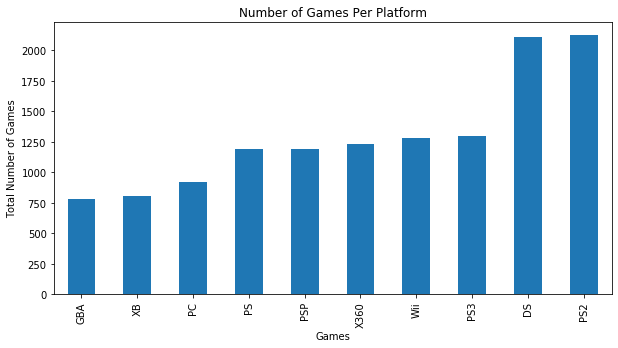

In [356]:
chart = df['Platform'].value_counts().sort_values().tail(10).plot(kind = 'bar', figsize = (10,5))
chart.set_title('Number of Games Per Platform')
chart.set_xlabel('Games')
chart.set_ylabel('Total Number of Games')